# Subgroup A, Question 3

## Importing from Google Drive

In [9]:
# Importing From Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing The Necessary Packages

For this question, we will need to import several packages, including pandas for data cleaning and transformation, numpy for numefical computation, matplotlib and seaborn for data visualizations, sklearn for Machine Learning Model implementation, as well as plotly to generate Sankey diagrams.

In [10]:
# Importing The Necessary Packages

# 1. pandas - to be used for data cleaning
import pandas as pd

# 2. numpy - to be used for numerical computing
import numpy as np

# 3. matplotlib - to be used for data visualizations
import matplotlib.pyplot as plt

# 4. seaborn - to be used for data visualizations
import seaborn as sns

# 5. sklearn - to be used for Machine Learning implementation
import sklearn

# 6. networkx - to be used for graph-related operations
import networkx as nx

# 7. Counter - to be used for counting how often each transition occurs
from collections import Counter

In [11]:
# # To download requirement.txt onto local computer

# import pkg_resources

# # List only the packages you imported
# used_packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'networkx']

# with open("requirements.txt", "w") as f:
#     for pkg in used_packages:
#         try:
#             version = pkg_resources.get_distribution(pkg).version
#             f.write(f"{pkg}=={version}\n")
#         except:
#             print(f"⚠️ Package '{pkg}' not found")

# # Download it
# from google.colab import files
# files.download("requirements.txt")

## Other Settings Implemented Using Pandas

This is an optional step but the following block of code below helps to change the output structure of the code such that

**1) All the columns of the dataset will be printed**

**2) The width of the dataset output is not limited to the display width of Google Colab**

**3) Prevent wrapping the output to multiple lines on Google Colab to improve readibility**

In [12]:
# Show all columns of the dataset when printed
pd.set_option('display.max_columns', None)

# Don't limit the display width of the output
pd.set_option('display.width', None)

# Don't wrap the output to multiple lines
pd.set_option('display.expand_frame_repr', False)

## Reading The Excel File From Google Drive To Google Colab

In [13]:
# Specify the file path of the excel file
file_path = '/content/drive/MyDrive/uss_survey_responses.xlsx'

# Read the excel file into Google Colab using read_excel
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

               time_entry               Email Address                     q1                q2_1    q2_2     q3              q4_1              q4_2              q4_3              q4_4  q5_1  q5_2  q5_3  q5_4                                                 q6                                                 q7                      q8  q9                                  q10                                        q11                       q12                   q13                                              q14_1                                              q14_2                                              q14_3                                              q14_4                                              q14_5                                              q14_6                                              q14_7                          q14_8  q15  q16_1  q16_2  q16_3  q16_4  q16_5  q17_1  q17_2  q17_3  q17_4  q17_5  q17_6                                              q18_1              

## Examining The Number Of Rows And Columns Of The Dataset

We can examine the number of rows and columns of the dataset using `df.shape`, where the first number represents the number of rows and the second number represents the number of columns of the dataset.

In [14]:
# Finding the number of rows and columns of the dataset
num_rows, num_columns = df.shape

# Displaying the results
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 505
Number of Columns: 57


We observe that there are 505 rows and 57 columns in the dataset.
The columns include the email address of the survey responders, as well as their responses to the 20 questions in the survey (some of the survey questions have various subparts, hence more than 20 columns altogether). We currently have 505 survey responses in our dataset.

Since the email address is considered highly confidential, in order to maintain data integrity to prevent exposure of information and privacy leaks, we should remove the `email address` column. Also, the `time_entry` column is not really important in our analysis as this column just represents when the respondants have completed the survey (within a period of a few days, all recent entries). We can also remove the column.

In [15]:
# Removing the email addressand time_entry column of the dataset
df = df.drop('Email Address', axis = 1)
df = df.drop('time_entry', axis = 1)

# Displaying the first few rows of the updated dataset
print(df.head())

                      q1                q2_1    q2_2     q3              q4_1              q4_2              q4_3              q4_4  q5_1  q5_2  q5_3  q5_4                                                 q6                                                 q7                      q8  q9                                  q10                                        q11                       q12                   q13                                              q14_1                                              q14_2                                              q14_3                                              q14_4                                              q14_5                                              q14_6                                              q14_7                          q14_8  q15  q16_1  q16_2  q16_3  q16_4  q16_5  q17_1  q17_2  q17_3  q17_4  q17_5  q17_6                                              q18_1                                              q18_2               

## What Each Column Of The Dataset Represent (From The Survey Questions)

Here is a description of the what each of the various columns of the dataset represent:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            border: 1px solid black;
            padding: 10px;
            text-align: center;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th>Column Name</th>
                <th>Description Of Column</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>q1</td>
                <td>Which type of theme park visitor best describes you?</td>
            </tr>
            <tr>
                <td>q2_1</td>
                <td>What is your age range?</td>
            </tr>
            <tr>
                <td>q2_2</td>
                <td>What is your gender?</td>
            </tr>
            <tr>
                <td>q3</td>
                <td>Are you a tourist or a local?</td>
            </tr>
            <tr>
                <td>q4_1</td>
                <td>For the category on thrill rides, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q4_2</td>
                <td>For the category on interactive exhibits, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q4_3</td>
                <td>For the category on performances, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q4_4</td>
                <td>For the category on food and dining, what is the average time you queued for?</td>
            </tr>
            <tr>
                <td>q5_1</td>
                <td>For the category on thrill rides, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q5_2</td>
                <td>For the category on interactive exhibits, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q5_3</td>
                <td>For the category on performances, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q5_4</td>
                <td>For the category on food and dining, what is considered an unacceptable wait time? (Integer in Minutes)</td>
            </tr>
            <tr>
                <td>q6</td>
                <td>The type of attractions you enjoy the most when visiting USS</td>
            </tr>
            <tr>
                <td>q7</td>
                <td>Factors that will influence your decision to visit a theme park like USS?</td>
            </tr>
            <tr>
                <td>q8</td>
                <td>What type of events influence your decision to visit?</td>
            </tr>
            <tr>
                <td>q9</td>
                <td>How long do you usually spend at USS? (Integer in Hours)</td>
            </tr>
            <tr>
                <td>q10</td>
                <td>When do you usually visit theme parks or attractions like USS?</td>
            </tr>
            <tr>
                <td>q11</td>
                <td>When do you typically purchase meals or snacks at the eateries/restaurants?</td>
            </tr>
            <tr>
                <td>q12</td>
                <td>How do you usually navigate a theme park like USS?</td>
            </tr>
            <tr>
                <td>q13</td>
                <td>Would you be willing to wear a digital watch given by USS to track your location and activity?</td>
            </tr>
            <tr>
                <td>q14_1</td>
                <td>At what time of the day do you usually visit roller coasters?</td>
            </tr>
            <tr>
                <td>q14_2</td>
                <td>At what time of the day do you usually visit water rides?</td>
            </tr>
            <tr>
                <td>q14_3</td>
                <td>At what time of the day do you usually visit 3D/4D experiences?</td>
            </tr>
            <tr>
                <td>q14_4</td>
                <td>At what time of the day do you usually visit performances?</td>
            </tr>
            <tr>
                <td>q14_5</td>
                <td>At what time of the day do you usually visit roadshows?</td>
            </tr>
            <tr>
                <td>q14_6</td>
                <td>At what time of the day do you usually visit eateries and restaurants?</td>
            </tr>
            <tr>
                <td>q14_7</td>
                <td>At what time of the day do you usually visit souvenir shops?</td>
            </tr>
            <tr>
                <td>q14_8</td>
                <td>At what time of the day do you usually visit other rides (carousel rides, teacup rides etc.)?</td>
            </tr>
            <tr>
                <td>q15</td>
                <td>How likely are you to recommend USS to others?</td>
            </tr>
            <tr>
                <td>q16_1</td>
                <td>How satisfied are you with the overall service of the queuing system?</td>
            </tr>
            <tr>
                <td>q16_2</td>
                <td>How satisfied are you with the overall service of retail experience?</td>
            </tr>
            <tr>
                <td>q16_3</td>
                <td>How satisfied are you with the overall service of eateries/restaurants?</td>
            </tr>
            <tr>
                <td>q16_4</td>
                <td>How satisfied are you with the overall service of photo taking exhibitions?</td>
            </tr>
            <tr>
                <td>q16_5</td>
                <td>How satisfied are you with the overall service of entertainment attractions?</td>
            </tr>
            <tr>
                <td>q17_1</td>
                <td>Give an overall rating for ticketing information accessibility</td>
            </tr>
            <tr>
                <td>q17_2</td>
                <td>Give an overall rating for rides and attractions</td>
            </tr>
            <tr>
                <td>q17_3</td>
                <td>Give an overall rating for entertainment and performances</td>
            </tr>
            <tr>
                <td>q17_4</td>
                <td>Give an overall rating for food and beverage</td>
            </tr>
            <tr>
                <td>q17_5</td>
                <td>Give an overall rating for merchandise and shopping</td>
            </tr>
            <tr>
                <td>q17_6</td>
                <td>Provide an overall rating for crowd management, comfort and staff helpfulness</td>
            </tr>
            <tr>
                <td>q18_1</td>
                <td>For ticketing information accessibility, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_2</td>
                <td>For rides and attractions, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_3</td>
                <td>For entertainment and performances, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_4</td>
                <td>For food and beverage, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_5</td>
                <td>For merchandise and shopping, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q18_6</td>
                <td>For crowd management, comfort and staff helpfulness, which of the following services are you not satisfied with?</td>
            </tr>
            <tr>
                <td>q19_1</td>
                <td>How important is ticketing information accessibility to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_2</td>
                <td>How important is crowd management to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_3</td>
                <td>How important is staff helpfulness to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_4</td>
                <td>How important is safety and cleanliness to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_5</td>
                <td>How important is rides and attractions to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_6</td>
                <td>How important is food and beverage to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_7</td>
                <td>How important is merchandise and shopping to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q19_8</td>
                <td>How important is entertainment and performances to your overall satisfaction?</td>
            </tr>
            <tr>
                <td>q20</td>
                <td>Is there any other feedback about your USS experience that you want to mention?</td>
            </tr>
        </tbody>
    </table>
</body>
</html>

--------------------------------------------------------------------------------

### Business Question 3: Guest Journey Patterns

#### Overview Of Guest Jounney Patterns In USS:

Understanding guest journey patterns at Universal Studios Singapore (USS) is essential for enhancing customer satisfaction and optimizing operational efficiency. By analyzing visitor movement throughout the park using process mining and sequence analysis, USS can identify common pathways guests take, peak congestion points, and areas where engagement drops.

Different visitor segments — such as families, thrill-seekers, tourists, and annual pass holders—exhibit unique behaviors, influencing their ride preferences, dining choices, and show attendance. Recognizing these patterns allows USS to implement data-driven strategies to improve the overall guest experience.

Personalized recommendations, optimized ride wait times, and targeted promotions can help distribute crowds more effectively, reducing bottlenecks and ensuring a smoother park experience. Additionally, insights into guest flow can inform staffing decisions, enhance queue management, and improve layout planning for future park developments. By leveraging guest journey data, USS can align its operations with visitor expectations, fostering higher customer satisfaction, increasing repeat visitation, and ultimately driving greater revenue through improved experiences and guest engagement.

We can ask this business question: **How do common guest journey patterns provide opportunities for personalisation and operational improvements?**

Guest journey patterns in Universal Studios Singapore (USS) can be analyzed using process mining and sequence analysis to uncover common pathways guests take throughout their visit. Understanding these patterns helps in optimizing park operations, reducing congestion, and enhancing personalization for different visitor segments.

To tackle this business question, we need to

Step 1: Extract the relevant columns from the `uss_survey_reeponses` dataset as well as the `clustered_df` dataset and merge all the relevant columns into a combined dataset.

Step 2: Preparing a machine-friendly version for the respective columns of dataset and creating vistor flow timings.  

Step 3: Create The Overall Network Graph Of Vistor Timings, As Well As The Breakdown Of The Top Few Visitor Flow Routes For Various Clusters

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### Step 1: Extract Relevant Columns From `uss_survey_reeponses` And `clustered_df` Datasets, Merge All Relevant Columns To A Combined Dataset

##### Extra Dataset That We Will Be Using

In addition to the `uss_survey_responses` excel file, we will also import the clustered dataset that is obtained from Subgroup A, Question 2 as the second dataset for consideration.

In [16]:
# Read in clustered data from Subgroup A, Question 2
clustered_df = pd.read_csv('/content/drive/MyDrive/uss_clustered_data_Q2.csv')

# Display the first few rows of the dataset
print(clustered_df.head())

   Unnamed: 0  cluster                     q1                q2_1    q2_2     q3              q4_1              q4_2              q4_3              q4_4  q5_1  q5_2  q5_3  q5_4                                                 q6                                                 q7                      q8  q9                                  q10                                        q11                       q12                   q13                                              q14_1                                              q14_2                                              q14_3                                              q14_4                                              q14_5                                              q14_6                                              q14_7                          q14_8  q15  q16_1  q16_2  q16_3  q16_4  q16_5  q17_1  q17_2  q17_3  q17_4  q17_5  q17_6                                              q18_1                                             

##### Extracting The Relevant Columns For Analysis

For analysis of guest journey, we will focus on:

Original Dataset `uss_survey_responses`:
* `q1` : Which type of theme park visitor best describes you?
* `q2_1`: What is your age range?
* `q2_2`: What is your gender?
* `q3`: Are you a tourist or a local?
* `q9`: How long do you usually spend at USS? (Integer in Hours))
* `q11`: When do you typically purchase meals or snacks at the eateries/restaurants?
* `q12`: How do you usually navigate a theme park like USS?
* `q14_1`: At what time of the day do you usually visit roller coasters?
* `q14_2`: At what time of the day do you usually visit water rides?
* `q14_3`: At what time of the day do you usually visit 3D/4D experiences?
* `q14_4`: At what time of the day do you usually visit performances?
* `q14_5`: At what time of the day do you usually visit roadshows?
* `q14_6`: At what time of the day do you usually visit eateries and restaurants?
* `q14_7`: At what time of the day do you usually visit souvenir shops?
* `q14_8`: At what time of the day do you usually visit other rides?

Extra Dataset `clustered_df`:
* `cluster`: Cluster group


We first identify all columns in the DataFrame `df` that start with `q14_` and stores their names in the list `q14_cols`. We then standardize text values within these columns by replacing occurrences of "i Do Not Visit" with "I Do Not Visit" using the `.map()` function, ensuring consistency in the dataset. Next, it defines a list of selected columns, including specific ones (`q1`, `q2_1`, `q2_2`, `q3`, `q9`, `q11`, `q12`) along with the previously identified `q14_cols`.

Using this list, the code creates a new filtered DataFrame called `df_filtered`, which contains only the relevant columns. Finally, it prints a summary of missing values for each column in df_filtered using `.isna().sum()` to ensure that there are no missing value for each column.

In [17]:
# Select columns that start with 'q14_'
q14_cols = [col for col in df.columns if col.startswith('q14_')]

# Standardize text values efficiently with .apply(map())
df[q14_cols] = df[q14_cols].apply(lambda col: col.map(lambda x: 'I Do Not Visit' if x == 'i Do Not Visit' else x))

# Define columns of interest, add specific column names manually
selected_cols = ['q1', 'q2_1', 'q2_2', 'q3', 'q9', 'q11', 'q12'] + q14_cols

# Create new filtered DataFrame
df_filtered = df[selected_cols]

# Print summary of null values
print("Null values per column: ")
print()
print(df_filtered.isna().sum())

Null values per column: 

q1       0
q2_1     0
q2_2     0
q3       0
q9       0
q11      0
q12      0
q14_1    0
q14_2    0
q14_3    0
q14_4    0
q14_5    0
q14_6    0
q14_7    0
q14_8    0
dtype: int64


In [18]:
# Drop rows with missing values
df_clean = df_filtered.dropna()

# Printing the cleaned dataset
print('First Few Rows After Removing Null Values:')
print()
print(df_clean.head())

First Few Rows After Removing Null Values:

                      q1                q2_1    q2_2     q3  q9                                        q11                       q12                                              q14_1                                              q14_2                                              q14_3                                              q14_4                                              q14_5                                              q14_6                                              q14_7                          q14_8
0         Solo Traveller  13 To 20 Years Old    Male  Local   5  Lunch (11am to 2pm), Teatime (2pm to 5pm)   Spontaneous Exploration                        Late Morning (10am to 12pm)                                     I Do Not Visit                                     I Do Not Visit                               Evening (4pm to 6pm)                        Late Afternoon (2pm to 4pm)                      Early Afternoon (12pm to 2

--------------------------------------------------------------------------------

##### Merge clustered data from SubA, QN2 onto my df

Next, we are going to merge the two datasets that we have - `uss_suvey_responses` (represented by `df_clean`) and the clustered dataset `clustered_df` (represented by `df_cluster`). However, before merging, we need to ensure that the number of rows of `uss_survey_responses` is exactly equal to the number of rows of `clustered_df` to guarantee proper joining.

In [19]:
# Determining the number of rows of the uss_survey_responses dataset
print(f"Number Of Rows Of Survey Responses Dataset: {len(df_clean)}")

# Determining the number of rows of the clustered_df dataset
print(f"Number Of Rows Of Clustered Dataset: {len(clustered_df)}")

Number Of Rows Of Survey Responses Dataset: 505
Number Of Rows Of Clustered Dataset: 505


We observe that both the `uss_survey_responses` dataset and the `clustered_df` dataset contain 505 rows, they have an equal number of rows, suggesting that neither of the dataset have any lacking rows that have been removed. We can now perform safe joining using the `.join` method to create a combined dataset with the relevant columns from the `uss_survey_responses` dataset identified earlier, coupled with the cluster columns each row is in from the `clustered_df` dataset.

In [20]:
# Merging the two datasets together to form a combined dataset
df_clean = df_clean.join(clustered_df[['cluster']])

# Printing the first few rows of the combined dataset
print("Combined Cleaned Dataset: ")
print()
print(df_clean.head())

Combined Cleaned Dataset: 

                      q1                q2_1    q2_2     q3  q9                                        q11                       q12                                              q14_1                                              q14_2                                              q14_3                                              q14_4                                              q14_5                                              q14_6                                              q14_7                          q14_8  cluster
0         Solo Traveller  13 To 20 Years Old    Male  Local   5  Lunch (11am to 2pm), Teatime (2pm to 5pm)   Spontaneous Exploration                        Late Morning (10am to 12pm)                                     I Do Not Visit                                     I Do Not Visit                               Evening (4pm to 6pm)                        Late Afternoon (2pm to 4pm)                      Early Afternoon (12pm to 2pm)    

--------------------------------------------------------------------------------

#### Step 2: Preparing A Machine Friendly Version For The Respective Columns Of Dataset And Creating Vistor Flow Timings

##### Convert Time Data For `qn14_` Into Time-Attraction Pair

First, we need to identify and understand the unique timings for the various categories for USS.

The code below extracts all unique time values from columns in `df_clean` that start with `q14_`. It first initializes an empty set called `unique_times` to store distinct time values. Then, it iterates through each column in `q14_cols`, filling any missing values (`NaN`) with an empty string to prevent errors. For each column, it applies a lambda function that splits the values by commas (,) and strips any leading or trailing spaces before adding them to the `unique_times` set.

This ensures that all time values, even if they are listed together in a single cell, are properly separated and stored uniquely. Finally, the code sorts and displays the collected unique time slots in ascending order.

In [21]:
# Get all unique time values from qn14

# Flatten all the values and split if they contain commas
unique_times = set()

for col in q14_cols:
    df_clean[col] = df_clean[col].fillna('')  # Handle NaNs
    df_clean[col].apply(lambda x: [unique_times.add(val.strip()) for val in x.split(',') if val.strip()])

# Show sorted unique time slots
print("Unique Time Value Categories For USS: ")
print()
sorted(unique_times)

Unique Time Value Categories For USS: 



['Early Afternoon (12pm to 2pm)',
 'Early Morning (8am to 10am)',
 'Evening (4pm to 6pm)',
 'I Do Not Visit',
 'Late Afternoon (2pm to 4pm)',
 'Late Morning (10am to 12pm)',
 'Lunch (11am to 2pm)',
 'Night (6pm to 9pm)']

We observe eight different categories with seven different time periods where surveyers can choose from - Early Morning (8am to 10am), Late Morning (10am to 12pm), Lunch (11am to 2pm), Early Afternoon (12pm to 2pm), Late Afternoon (2pm to 4pm), Evening (4pm to 6pm) and Night (6pm to 9pm). The last value is "I Do Not Visit", which means that the respondant did not visit the specific category of attractions.

Based on the timings, we observe that there is an overlap between Early Afternoon (12pm to 2pm) and Lunch (11am to 2pm). Hence, we need to remove the rows containing Lunch (11am to 2pm) to prevent data distortion and inaccuracies - we cannot determine whether the category of Lunch (11am to 2pm) falls under Late Morning (10am to 12pm) or arly Afternoon (12pm to 2pm) as both of these categories include timings from 11am to 2pm.

In [22]:
# Define the columns to check
q14_cols = [f"q14_{i}" for i in range(1, 9)]

# Remove rows where any of the specified columns contain "Lunch (11am to 2pm)"
df_clean = df_clean[~df_clean[q14_cols].isin(["Lunch (11am to 2pm)"]).any(axis=1)]

# Display the first few rows of the cleaned DataFrame
print(df_clean.head())

                      q1                q2_1    q2_2     q3  q9                                        q11                       q12                                              q14_1                                              q14_2                                              q14_3                                              q14_4                                              q14_5                                              q14_6                                              q14_7                          q14_8  cluster
0         Solo Traveller  13 To 20 Years Old    Male  Local   5  Lunch (11am to 2pm), Teatime (2pm to 5pm)   Spontaneous Exploration                        Late Morning (10am to 12pm)                                     I Do Not Visit                                     I Do Not Visit                               Evening (4pm to 6pm)                        Late Afternoon (2pm to 4pm)                      Early Afternoon (12pm to 2pm)                        Late Aft

We can proceed to check for the unique categories of the `df_clean` dataset after the removal of the "Lunch (11am to 2pm)" category from the dataset to ensure that these rows containing "Lunch (11am to 2pm)" are indeed removed from the dataset.

In [23]:
# Get all unique time values from qn14

# Flatten all the values and split if they contain commas
unique_times = set()

for col in q14_cols:
    df_clean[col] = df_clean[col].fillna('')  # Handle NaNs
    df_clean[col].apply(lambda x: [unique_times.add(val.strip()) for val in x.split(',') if val.strip()])

# Show sorted unique time slots
print("Unique Time Value Categories For USS: ")
print()
sorted(unique_times)

Unique Time Value Categories For USS: 



['Early Afternoon (12pm to 2pm)',
 'Early Morning (8am to 10am)',
 'Evening (4pm to 6pm)',
 'I Do Not Visit',
 'Late Afternoon (2pm to 4pm)',
 'Late Morning (10am to 12pm)',
 'Night (6pm to 9pm)']

We notice that after data cleaning, the category on "Lunch (11am to 2pm)" is removed and we have now six categories instead of seven. The data is now ready to be analyzed.

--------------------------------------------------------------------------------

##### Preparing A Machine Friendly Version Of Visitor Time Perferences

To prepare a machine-friendly version of visitor time preferences for different attractions, we need to first define a standardized order of time slots in the `time_order` list.

Starting from morning and ending at night, we have the order:

*   Early Morning (8am To 10am)
*   Late Morning (10am To 12pm)
*   Early Afternoon (12pm To 2pm)
*   Late Afternoon (2pm To 4pm)
*   Evening (4pm To 6pm)
*   Night (6pm To 9pm)

It then identifies all columns in `df_clean` that start with `q14_`, storing them in `q14_cols`, which represent visitor preferences for different attraction types. The `attraction_map` dictionary maps each of these columns to a more readable attraction label.

**NOTE: To ensure consistency, the code cleans and standardizes the data by converting each column's values to strings and applying a function that splits entries by commas, strips leading/trailing spaces, and capitalizes each word. This process ensures that time preferences are properly structured and formatted for further analysis.**

In [24]:
# To get flattened, machine-friendly version of visitor time preferences per attraction
# Sort the categories from morning to night

time_order = ['Early Morning (8Am To 10Am)', 'Late Morning (10Am To 12Pm)',
              'Early Afternoon (12Pm To 2Pm)', 'Late Afternoon (2Pm To 4Pm)',
              'Evening (4Pm To 6Pm)', 'Night (6Pm To 9Pm)']

# The q14 columns extracted
q14_cols = [col for col in df_clean.columns if col.startswith('q14_')]

# Map column to readable attraction label
attraction_map = {
    'q14_1': 'roller_coasters',
    'q14_2': 'water_rides',
    'q14_3': '3d/4d',
    'q14_4': 'performances',
    'q14_5': 'roadshows',
    'q14_6': 'eateries',
    'q14_7': 'souvenir',
    'q14_8': 'other_rides'
}


# Clean and split data in q14_cols properly using .loc to avoid SettingWithCopyWarning
for col in q14_cols:
    df_clean.loc[:, col] = df_clean[col].astype(str).apply(
        lambda x: [i.strip().title() for i in x.split(',') if i.strip()])

Next, we define a function `get_attraction_time_pairs()` that generates a list of time-attraction pairs for each row in the `df_clean` dataframe. It iterates over each column in `q14_cols`, mapping the column to its corresponding attraction label using `attraction_map`.

For each time slot in a row, the function checks if the visitor has selected "I Do Not Visit" and skips those entries. Valid time-attraction pairs are appended to a list, `visit_steps`. After collecting all pairs for a row, the function sorts them chronologically using the predefined `time_order` list.

The sorting ensures that visits are ordered from early to late in the day. The function then returns the sorted list of pairs. Finally, the function is applied to each row of `df_clean` using `apply()`, and the resulting time-attraction pairs are stored in a new column `attraction_journey`.

In [25]:
# Define the function get_attraction_time_pairs
def get_attraction_time_pairs(row):

    # Initialize an empty list to store the time-attraction pairs
    visit_steps = []

    for col in q14_cols:
        # Get the readable attraction name from the attraction_map dictionary
        attraction = attraction_map[col]
        # Iterate through each time_slot in the row's corresponding column
        for time_slot in row[col]:
            if time_slot != 'I Do Not Visit':
                visit_steps.append((time_slot, attraction))

    # Remove duplicates and sort visits by time_order (chronologically)
    visit_steps = sorted(set(visit_steps), key=lambda x: time_order.index(x[0]) if x[0] in time_order else 999)
    return visit_steps

# Apply the get_attraction_time_pairs function to each row of the dataframe (axis=1 for row-wise operation)
df_clean.loc[:, 'attraction_journey'] = df_clean.apply(get_attraction_time_pairs, axis=1)

# Print out the first few rows of the resulting 'attraction_journey' column to see the output
print(df_clean['attraction_journey'].head())

0    [(Late Morning (10Am To 12Pm), other_rides), (...
1    [(Early Morning (8Am To 10Am), roller_coasters...
2    [(Early Morning (8Am To 10Am), 3d/4d), (Early ...
3    [(Early Morning (8Am To 10Am), roller_coasters...
4    [(Early Morning (8Am To 10Am), roller_coasters...
Name: attraction_journey, dtype: object


--------------------------------------------------------------------------------

### Keeping only one attraction for each time frame

The `first_per_time()` function processes a list of time-attraction pairs (journey), ensuring that each time slot is associated with only the first attraction listed for that time.

It iterates through the pairs, stripping any extra spaces and converting the attraction names to lowercase while replacing underscores with spaces. A set, `seen`, is used to track time slots that have already been processed, preventing duplicates. For each unique time slot, the function appends a formatted string of the form `time_slot - cleaned_attraction` to the result list. The function returns a list of unique time-attraction pairs, where each time slot appears only once with its first corresponding attraction.

An Example To Illustrate:

If the journey is `[("Early Morning", "roller_coasters"), ("Late Morning", "water_rides"), ("Early Morning", "performances")]`

The Function Will Return:

`["Early Morning - roller coasters", "Late Morning - water rides"]`

This removes any duplicate time slots, ensuring that each time slot appears only once with its first associated attraction. Note that for Early Morning, performances has been removed in the resulting list as `performances` is not the first entry of Early Morning, it is `roller_coasters`.

In [26]:
# Define the first_per_time_function
def first_per_time(journey):

    # Create an empty set to track seen time slots and avoid duplicates
    # Create an empty list to store the formatted time-attraction pairs
    seen = set()
    result = []

    for time_slot, attraction in journey:
        # Strip any leading or trailing spaces from the time_slot
        time_slot = time_slot.strip()
        if time_slot not in seen:
            # Clean the attraction name: strip spaces, convert to lowercase, and replace underscores with spaces
            cleaned_attraction = attraction.strip().lower().replace('_', ' ')
            # Append the formatted string to the result list
            result.append(f"{time_slot} - {cleaned_attraction}")
            # Mark the time slot as seen to avoid duplicates
            seen.add(time_slot)
    return result

Next, we processes the `df_clean` DataFrame by first applying the `first_per_time()` function to the `attraction_journey` column, which generates a list of time-attraction pairs with only the first attraction for each time slot. The results are stored in a new column called `first_only_journey`.

Then, we convert these lists into a single string of time-attraction pairs, where each pair is separated by an arrow (" ➝ "). This is achieved by applying a lambda function with `' ➝ '.join(x)` to each row of the `first_only_journey` column. The resulting strings are stored in the new `first_only_string` column. This results in a concise representation of each visitor's journey, with attractions listed in chronological order and separated by arrows.

In [37]:
# Apply the first_per_time function to create the first_only_journey column
df_clean.loc[:, 'first_only_journey'] = df_clean['attraction_journey'].apply(first_per_time)

# Apply the lambda function to join the time-attraction pairs into a string and store it in 'first_only_string'
df_clean.loc[:, 'first_only_string'] = df_clean['first_only_journey'].apply(lambda x: ' ➝ '.join(x))

# Displaying the first few rows of the df_clean dataset
print(df_clean.head())

                      q1                q2_1    q2_2     q3  q9                                        q11                       q12                                              q14_1                                              q14_2                                              q14_3                                              q14_4                                              q14_5                                              q14_6                                              q14_7                            q14_8  cluster                                 attraction_journey                                 first_only_journey                                  first_only_string
0         Solo Traveller  13 To 20 Years Old    Male  Local   5  Lunch (11am to 2pm), Teatime (2pm to 5pm)   Spontaneous Exploration                      [Late Morning (10Am To 12Pm)]                                   [I Do Not Visit]                                   [I Do Not Visit]                             [

The code `df_clean['first_only_string'].value_counts().head(5)` will give us the top 5 most frequent values in the `first_only_string` column of the `df_clean` DataFrame. It counts the occurrences of each unique value and then selects the top 5 most common ones.

In [28]:
# Count the occurrences of each unique string in the 'first_only_string' column
# and get the top 5 most frequent ones
df_clean['first_only_string'].value_counts().head()

,count
first_only_string,
Early Morning (8Am To 10Am) - 3d/4d ➝ Late Morning (10Am To 12Pm) - 3d/4d ➝ Early Afternoon (12Pm To 2Pm) - 3d/4d ➝ Late Afternoon (2Pm To 4Pm) - roller coasters ➝ Evening (4Pm To 6Pm) - water rides ➝ Night (6Pm To 9Pm) - roller coasters,2
Early Afternoon (12Pm To 2Pm) - roller coasters ➝ Late Afternoon (2Pm To 4Pm) - performances ➝ Evening (4Pm To 6Pm) - roadshows,2
Early Morning (8Am To 10Am) - roller coasters ➝ Late Morning (10Am To 12Pm) - 3d/4d ➝ Early Afternoon (12Pm To 2Pm) - 3d/4d ➝ Late Afternoon (2Pm To 4Pm) - water rides ➝ Evening (4Pm To 6Pm) - water rides ➝ Night (6Pm To 9Pm) - roller coasters,2
Early Morning (8Am To 10Am) - other rides ➝ Late Morning (10Am To 12Pm) - other rides ➝ Early Afternoon (12Pm To 2Pm) - 3d/4d ➝ Late Afternoon (2Pm To 4Pm) - roller coasters ➝ Evening (4Pm To 6Pm) - water rides ➝ Night (6Pm To 9Pm) - performances,2
Early Morning (8Am To 10Am) - water rides ➝ Late Morning (10Am To 12Pm) - other rides ➝ Early Afternoon (12Pm To 2Pm) - performances ➝ Late Afternoon (2Pm To 4Pm) - roller coasters ➝ Evening (4Pm To 6Pm) - water rides ➝ Night (6Pm To 9Pm) - souvenir,2


The most frequent paths are shared by no more than two visitors in the dataset, indicating that the paths taken by visitors are highly unique. Therefore, it would be more insightful to focus on exploring transitions rather than analyzing entire paths.

Insights that can be drawn from the unique paths in the dataset:

1) **Visitor Personalization:** The fact that the majority of paths are unique suggests that each visitor has a highly personalized experience, possibly based on individual preferences, interests, or timing.

2) **Attraction Preferences:** Unique paths highlight that visitors have varying interests in the attractions available, with only a few visitors following similar routes, indicating a broad range of preferences.

3) **Time-Specific Behaviors:** Since the paths are distinct, visitors may be influenced by specific time slots for their visits. For instance, certain attractions may have peak times during specific periods (e.g., early mornings vs. evenings), leading to different choices at different times of day.

4) **Diverse Visitor Journeys:** The data reveals a rich variety of visitor journeys, possibly showing how different people prioritize certain activities or attractions while leaving others out entirely. This highlights the need for more customized offerings or experiences.

--------------------------------------------------------------------------------

#### Step 3: Create The Overall Network Graph Of Vistor Timings, As Well As The Breakdown Of The Top Few Visitor Flow Routes For Various Clusters

Next, we will begin constructing the network of visitor flow routes for the overall USS journey using the Python library **NetworkX**.

NetworkX is a comprehensive Python package used for the creation, manipulation, and study of complex networks of nodes and edges. It provides tools for working with both undirected and directed graphs, offering functions to analyze network structure and visualize relationships.

In the context of our analysis, NetworkX will allow us to model the visitor flow between different attractions, examine transitions, and gain valuable insights into the patterns of movement within the USS park. By representing the visitor paths as a graph, we can better understand connectivity, identify high-traffic areas, and explore how visitors move through the park over time.

##### Creating An Overall Visitor Flow Graph Network Using NetworkX

In this network, each node represents a combination of a time slot and an activity (e.g., "Early Afternoon – eateries"). Each edge between nodes signifies the number of visitors who transitioned from one activity/time slot to another. This allows us to capture the flow of visitors between different attractions over time, giving insights into the patterns and intensity of movement across the park during various periods of the day.

The `is_valid_transition` function checks if the transition from one activity/time slot to another occurs in consecutive time order. It takes two input arguments: `src` (source) and `tgt` (target), which are strings representing the time slot and activity (example: "Early Afternoon - eateries"). The function extracts the time labels from these strings, compares their order in the `time_order` list, and returns `True` if the target time slot immediately follows the source time slot (the difference between their indices is 1). If either time slot is not found in the `time_order` list, it returns `False`, indicating that the transition is not valid.

In [29]:
# Function to check if the transition between two time slots is valid (consecutive)
def is_valid_transition(src, tgt):
    # Extract the time labels from the source and target strings
    src_time = src.split(' - ')[0].strip()  # Time part of the source (e.g., "Early Afternoon")
    tgt_time = tgt.split(' - ')[0].strip()  # Time part of the target (e.g., "Late Afternoon")

    try:
        # Check if the target time is consecutive to the source time in the predefined time order
        return time_order.index(tgt_time) - time_order.index(src_time) == 1
    except ValueError:
        # If either time label is not in the time_order list, return False
        return False

Next, we generate a list of visitor transitions between time/activity pairs and then count how frequently each transition occurs. It iterates through the `first_only_string` column of the `df_clean` DataFrame, which contains paths representing visitors' time/activity sequences. For each path, the code splits the string into individual time/activity steps and creates pairs of consecutive steps (representing transitions). These pairs are added to a list, `transition_pairs`. After collecting all the transitions, the `Counter` from the `collections` module is used to count how often each transition occurs, producing a frequency distribution stored in `transition_counts`.

In [30]:
# Create an empty list to store all the transitions between time/activity pairs
transition_pairs = []

# Iterate through each path in the 'first_only_string' column of the dataframe
for path in df_clean['first_only_string']:
    # Split the path into individual time/activity steps based on the ' ➝ ' separator
    steps = path.split(' ➝ ')
    # Generate transition pairs by combining consecutive time/activity steps
    for i in range(len(steps) - 1):
        transition_pairs.append((steps[i], steps[i+1]))

# Count the frequency of each transition using Counter
transition_counts = Counter(transition_pairs)

Next, we build and visualize a directed graph using `NetworkX` to represent visitor transitions between time/activity slots based on the previously computed transition counts.

A directed graph (DiGraph) is created, where each edge represents a transition from one time/activity pair (source) to another (target), with the transition frequency (weight) as the edge's attribute. The graph layout is determined using the spring layout algorithm, and the graph is displayed using `Matplotlib`. Nodes are drawn with a light blue color, and edges are drawn with widths proportional to the transition frequency. Edge labels represent the flow counts (weights) of each transition.

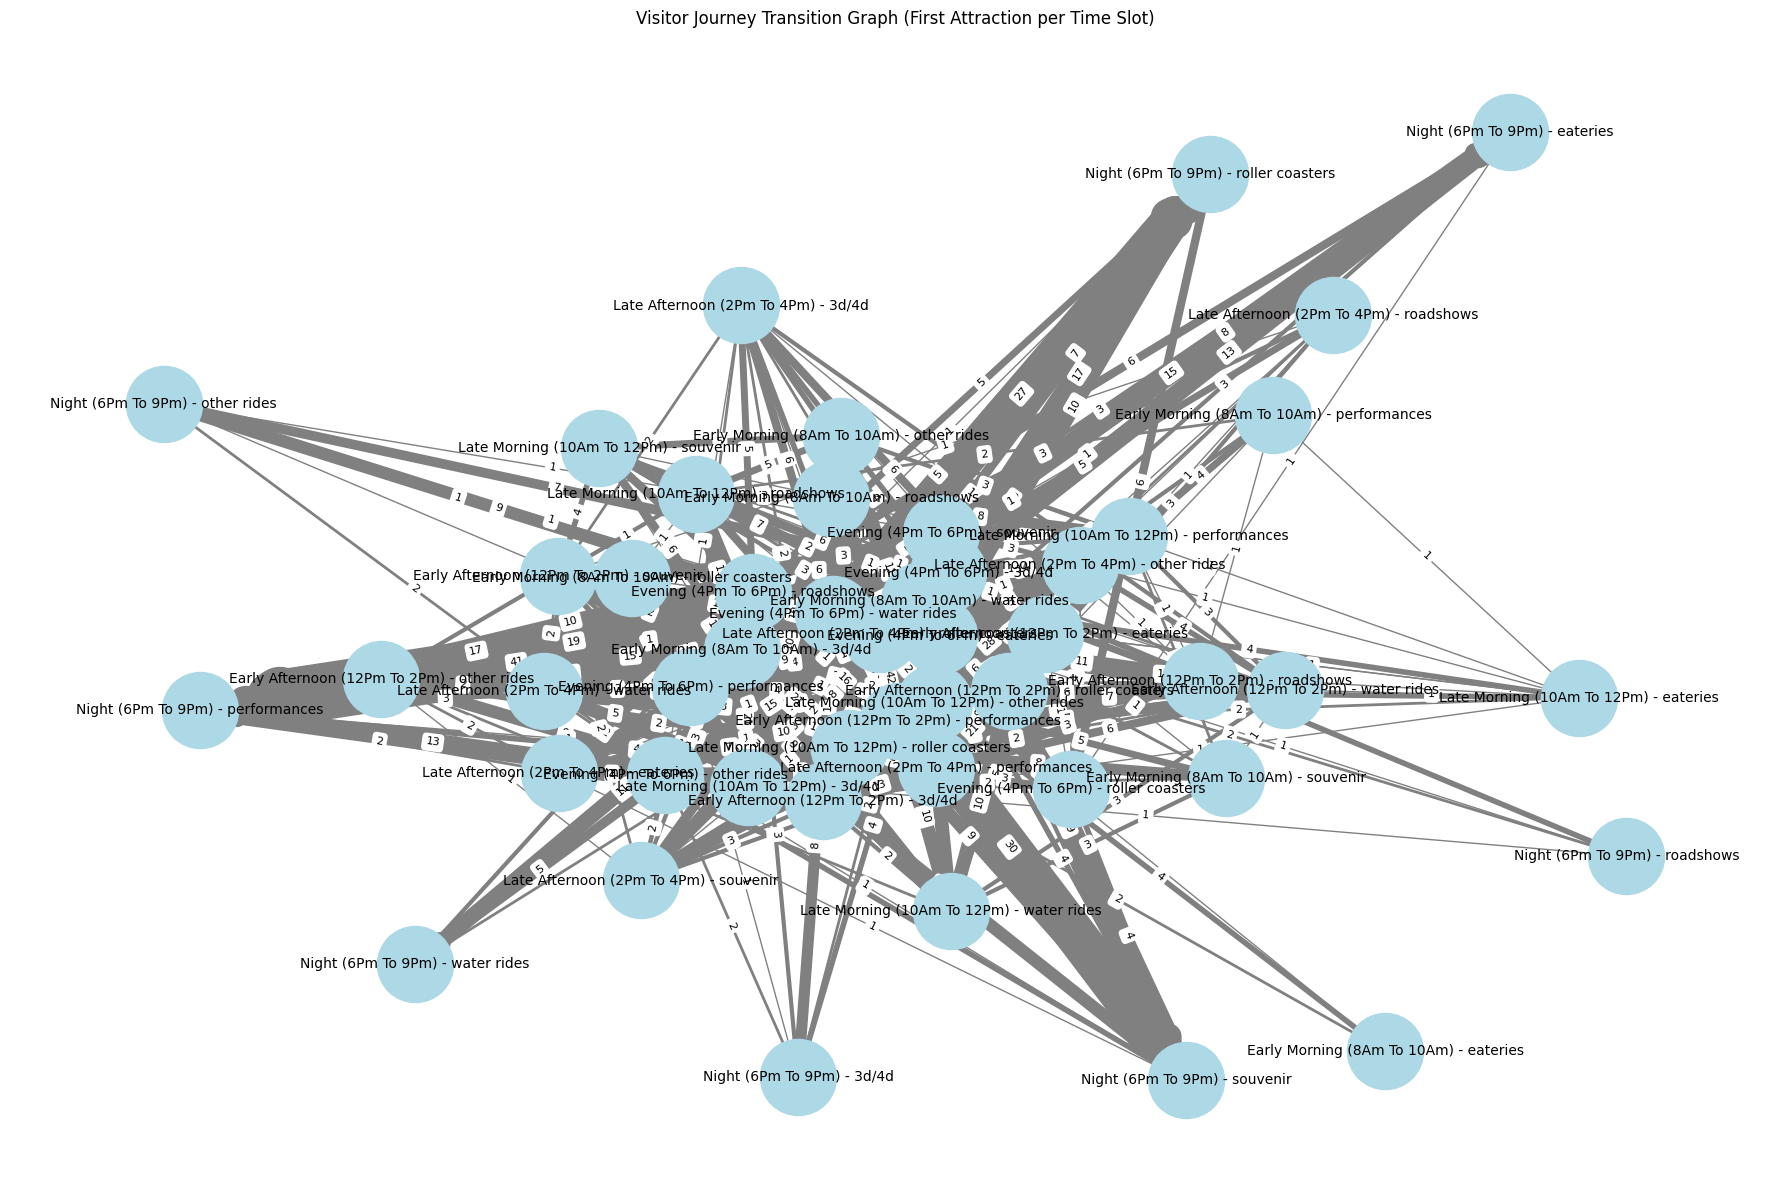

In [31]:
# Build a directed graph (DiGraph) to represent transitions
G = nx.DiGraph()

# Iterate over the transition pairs and their weights
# Add each pair as an edge to the graph with the transition frequency (weight)
for (src, tgt), weight in transition_counts.items():
    G.add_edge(src, tgt, weight=weight)

# Set layout for graph visualization using spring layout algorithm
# The 'k' parameter controls the distance between nodes, and 'seed' ensures reproducibility
pos = nx.spring_layout(G, k=1.5, seed=42)

# Create a figure for the graph visualization with specified size
plt.figure(figsize=(18, 12))

# Draw nodes of the graph with light blue color and increased size
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000)

# Draw the edges of the graph with width proportional to the transition weight (flow count)
# Also, display arrows to indicate direction of transitions
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (_, _, d) in edges],
                       edge_color='gray', arrows=True)

# Draw labels for the nodes with a font size of 10
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edge labels to display transition flow counts (weights) on the graph
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Visitor Journey Transition Graph (First Attraction per Time Slot)")
plt.axis('off')
plt.tight_layout()
plt.show()

The graph represents a Visitor Journey Transition Graph, illustrating how visitors move between different attractions at USS based on time slots and user preferences.

Characteristics Of The Graph:

**1) Highly Connected Network:**

The graph is densely connected, indicating that visitors transition between multiple attractions throughout the day. The thick edges suggest frequent transitions between certain attractions, while thinner edges represent less common transitions.

**2) Key Attractions per Time Slot:**

Larger nodes indicate attractions that serve as major hubs of visitor activity at specific times. Attractions like "eateries," "roller coasters," and "performances" appear to be popular at night (6 PM to 9 PM). Roadshows and souvenir shops see notable engagement during early morning and late morning periods.

**3) Time-Based Trends:**

*   Morning (8 AM - 12 PM): Visitors seem to start their day with roadshows, souvenirs, and water rides.
*   Afternoon (12 PM - 6 PM): Higher engagement in eateries, roller coasters, and 3D/4D shows.
*   Night (6 PM - 9 PM): Performances, eateries, and roller coasters dominate visitor interest.

**4) Visitor Flow & Transitions:**

Some attractions (e.g., eateries) act as key transition points, likely serving as resting spots before visitors move on to other activities. There are direct transitions between certain ride categories, suggesting visitor preferences for consecutive thrill-based activities.

However, showing the overall full transitions for every visitor surveyed will be too messy, hence we will display the top 10 most common transitions instead for better clarity and less overload.

--------------------------------------------------------------------------------

##### Visualizing The Top 10 Visitor Journey Transitions

Now, let us visualize the top 10 most frequent visitor journey transitions between attractions based on time slots using a directed graph. First, we filter transitions to ensure only valid consecutive time jumps are included. The transitions are then sorted by frequency, keeping only the top 10.

A directed graph is created similarly using NetworkX, where nodes represent attractions, and edges represent visitor transitions weighted by frequency. The graph is then visualized using a spring layout, with nodes displayed in light blue, edges in gray, and edge thickness varying based on transition frequency.

In [32]:
# STEP 1: Filter transitions to keep only the top 10 valid ones
filtered_transitions = [
    (s, t, w) for (s, t), w in transition_counts.items()
    if is_valid_transition(s, t)
]

# STEP 2: Sort transitions by weight (frequency) and keep the top 10
top_transitions = sorted(filtered_transitions, key=lambda x: x[2], reverse=True)[:10]

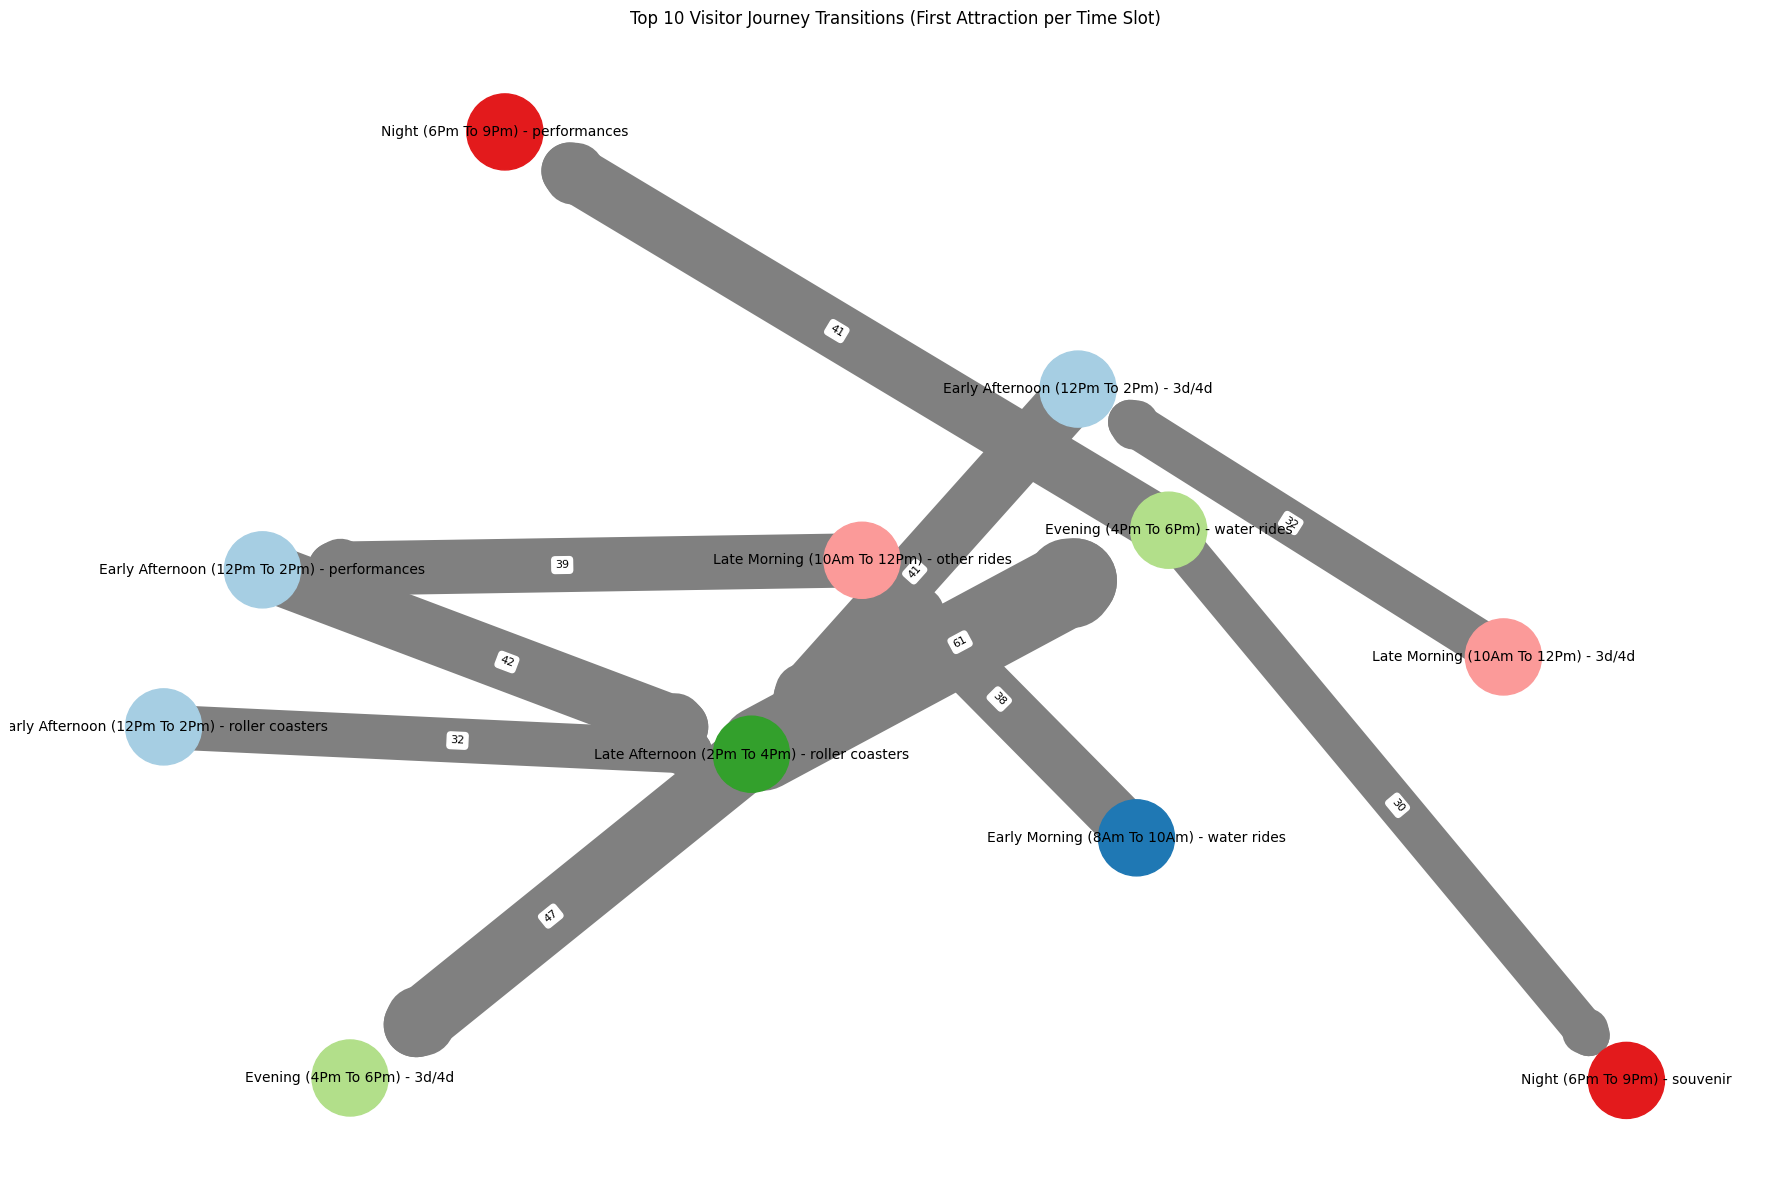

In [33]:
# STEP 3: Create a directed graph and add top transitions as edges
G = nx.DiGraph()
for src, tgt, weight in top_transitions:
    G.add_edge(src, tgt, weight=weight)

# Extract unique time slots from node names
def extract_time_slot(node_label):
    return node_label.split(" - ")[0]  # Get "Evening (4Pm To 6Pm)" part

# Assign a unique color to each time slot
time_slots = sorted({extract_time_slot(node) for node in G.nodes()})
color_map = {
    slot: color for slot, color in zip(
        time_slots,
        plt.cm.Paired.colors[:len(time_slots)]  # Pick a colormap with enough distinct colors
    )
}

# Get node color list based on time slot
node_colors = [color_map[extract_time_slot(node)] for node in G.nodes()]


# STEP 4: Generate node positions using a spring layout for better visualization
pos = nx.spring_layout(G, k=3, seed=42)
plt.figure(figsize=(18, 12))

# Draw nodes with color based on time slot
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000)

# Extract edge data and draw edges with varying widths based on weight
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos,edgelist=edges, width=[d['weight'] for (_, _, d) in edges],
                      edge_color='gray', arrows=True)

# Add labels for nodes
nx.draw_networkx_labels(G, pos, font_size=10)

# Annotate edges with their weights
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Top 10 Visitor Journey Transitions (First Attraction per Time Slot)")
plt.axis('off')
plt.tight_layout()
plt.show()

**Key Insights from the Top 10 Visitor Journey Transitions Graph:**

This graph shows the top 10 visitor journey transitions between different attractions and time slots at what appears to be a theme park.

1) Early Morning (8AM-10AM) appears to be dominated by eateries, suggesting visitors like to eat breakfast first before starting their day.

2) Late Morning (10AM-12PM) shows two distinct visitor behaviors: after eating breakfast, visitors attend roadshows or go to other rides.

3) The strongest single transition (58) is between Late Morning roadshows and Early Afternoon other rides, indicating many visitors bookend their day with these contrasting experiences.

4) The transitions to and from "Early Afternoon (12PM-2PM) - other rides" show this is a central hub time slot with multiple incoming and outgoing visitor flows, likely representing a midday decision point for many visitors. From other rides, visitors transit to 3d/4d, performances and roller coasters in Late Afternoon (2PM-4PM). With the second largest single transition made to roller coasters, indicating visitors' preference for rides in midday.


5) Visitors tend to end their day (Evening 4PM-6PM) with performances, followed by 3d/4d at Night (6pm to 9pm). This pattern suggests vistors' preference to keep the night activity chill.

--------------------------------------------------------------------------------

##### Visualizing The Top 5 Transition Routes By Cluster

Next, we will focus on visualizing the top 5 transition routes by cluster rather than overall, allowing for a more granular analysis of guest journey patterns at USS.

By segmenting transitions into clusters, we can uncover distinct visitor behaviors within each category. This approach enables us to identify localized movement trends, for instance whether thrill-seekers tend to visit multiple roller coasters sequentially or if families prefer alternating between shows and interactive experiences.

Additionally, analyzing transitions within clusters helps optimize resource allocation, queue management, and guest engagement strategies by tailoring operational decisions to specific visitor preferences. This deeper level of insight ensures a more refined understanding of how different guest segments navigate the park, ultimately enhancing both operational efficiency and visitor satisfaction.

Before visualizing by cluster, we need to perform some data cleaning steps first. We first need to check for any `NA` values in the `cluster` column of the `df_clean` dataset as having `NA` values for `cluster` will affect the number of clusters we have, as well as the overall popular guest journey transitions. We can chck for NA values using `.isna().sum()` method on the `cluster` column.

In [34]:
# Check for NA values in the cluster column
print(f"Number Of NA Values In Cluster Column: {df_clean['cluster'].isna().sum()}")

Number Of NA Values In Cluster Column: 9


We observe that there are 9 `NA` values in the `cluster` column, which might affect our results. We now proceed to drop these rows with NA values using the `.dropna()` method.

In [35]:
# Drop rows with missing cluster categorization values
df_clean = df_clean.dropna(subset=['cluster'])

print(f"Number Of NA Values In Cleaned Cluster Column: {df_clean['cluster'].isna().sum()}")

Number Of NA Values In Cleaned Cluster Column: 0


**Cluster-based insights from Subgroup A, Q2**
* Cluster 0: "The All-Rounder" – Appeals to a diverse mix of visitors, including families, friends, and solo travelers. Prefers a balanced theme park experience with a variety of attractions.


* Cluster 1: "The Thrill-Seeking Socialite" – Dominated by young adults visiting with friends. Prefers roller coasters, shopping, and spontaneous exploration.

* Cluster 2: "The Tourist Explorer" – Composed entirely of tourists, with balanced preferences across attractions. Enjoys a mix of experiences and prefers spontaneous navigation.

* Cluster 3: "The Family Fun-Seeker" – Predominantly families with young children and local visitors. Prefers food, general rides, and visits on holidays.

* Cluster 4: "The Young Family Planner" – The most child-focused group, preferring structured planning, shows, and special events. Visits mainly on public holidays.

* Cluster 5: "The Budget-Conscious Adventurer" – Young adult locals who prioritize cost, weather, and efficiency. Balances spontaneous exploration with queue management.

* Cluster 6: "The Event Enthusiast" – Primarily tourists who visit for special events and prioritize shows and standard rides. Enjoys weekdays and public holidays.

We will analyze visitor movement patterns within different clusters of attractions at USS. We need to iterate through each unique cluster and filter visitor paths to extract transition pairs—sequential movements between attractions.

Using a `Counter`, it tallies transition frequencies and filters them based on valid time progressions. The top 5 most frequent transitions within each cluster are selected and a directed graph (`DiGraph`) using NetworkX is built for each cluster.

The visualization displays nodes (attractions), directed edges (visitor movement), and edge thickness (transition frequency), offering insights into how visitors navigate within specific attraction categories. By segmenting by clusters, this approach uncovers localized guest movement trends, helping optimize attraction layouts and crowd flow management.

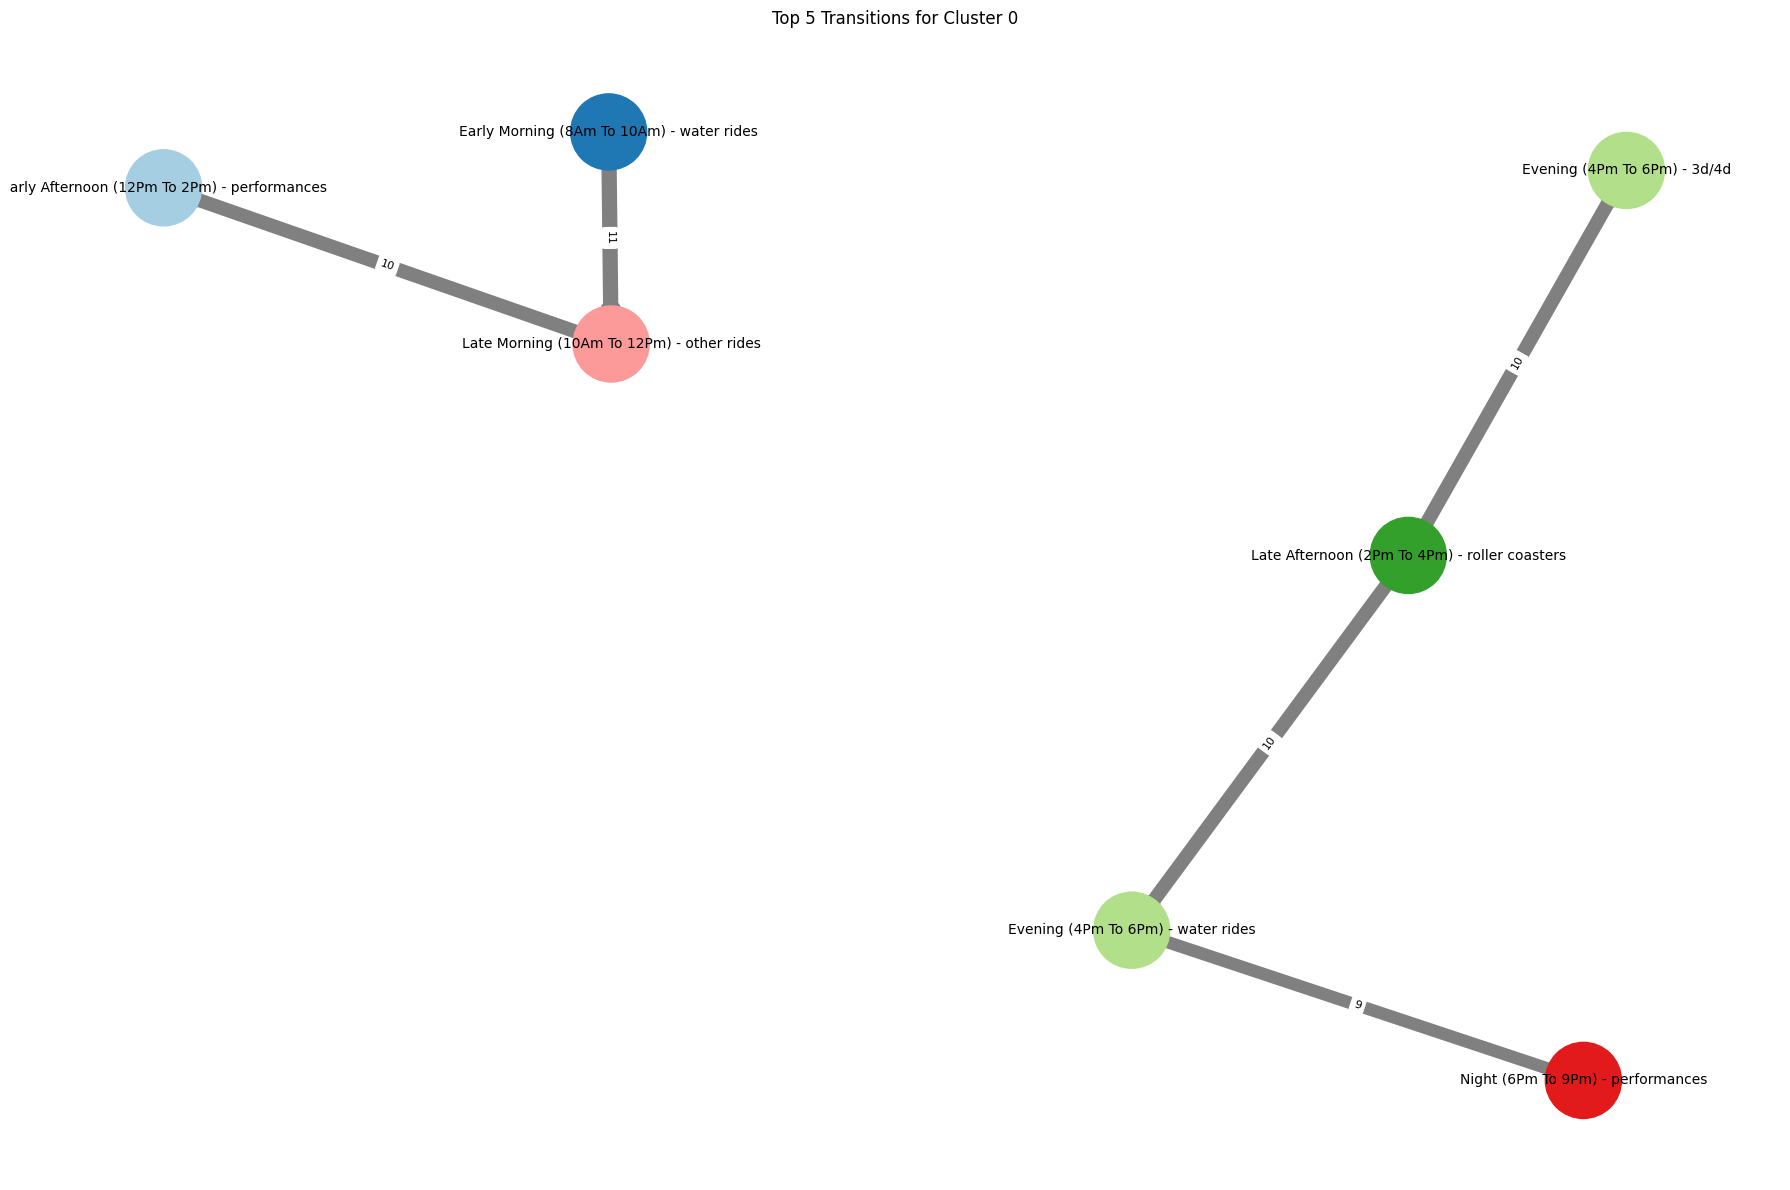

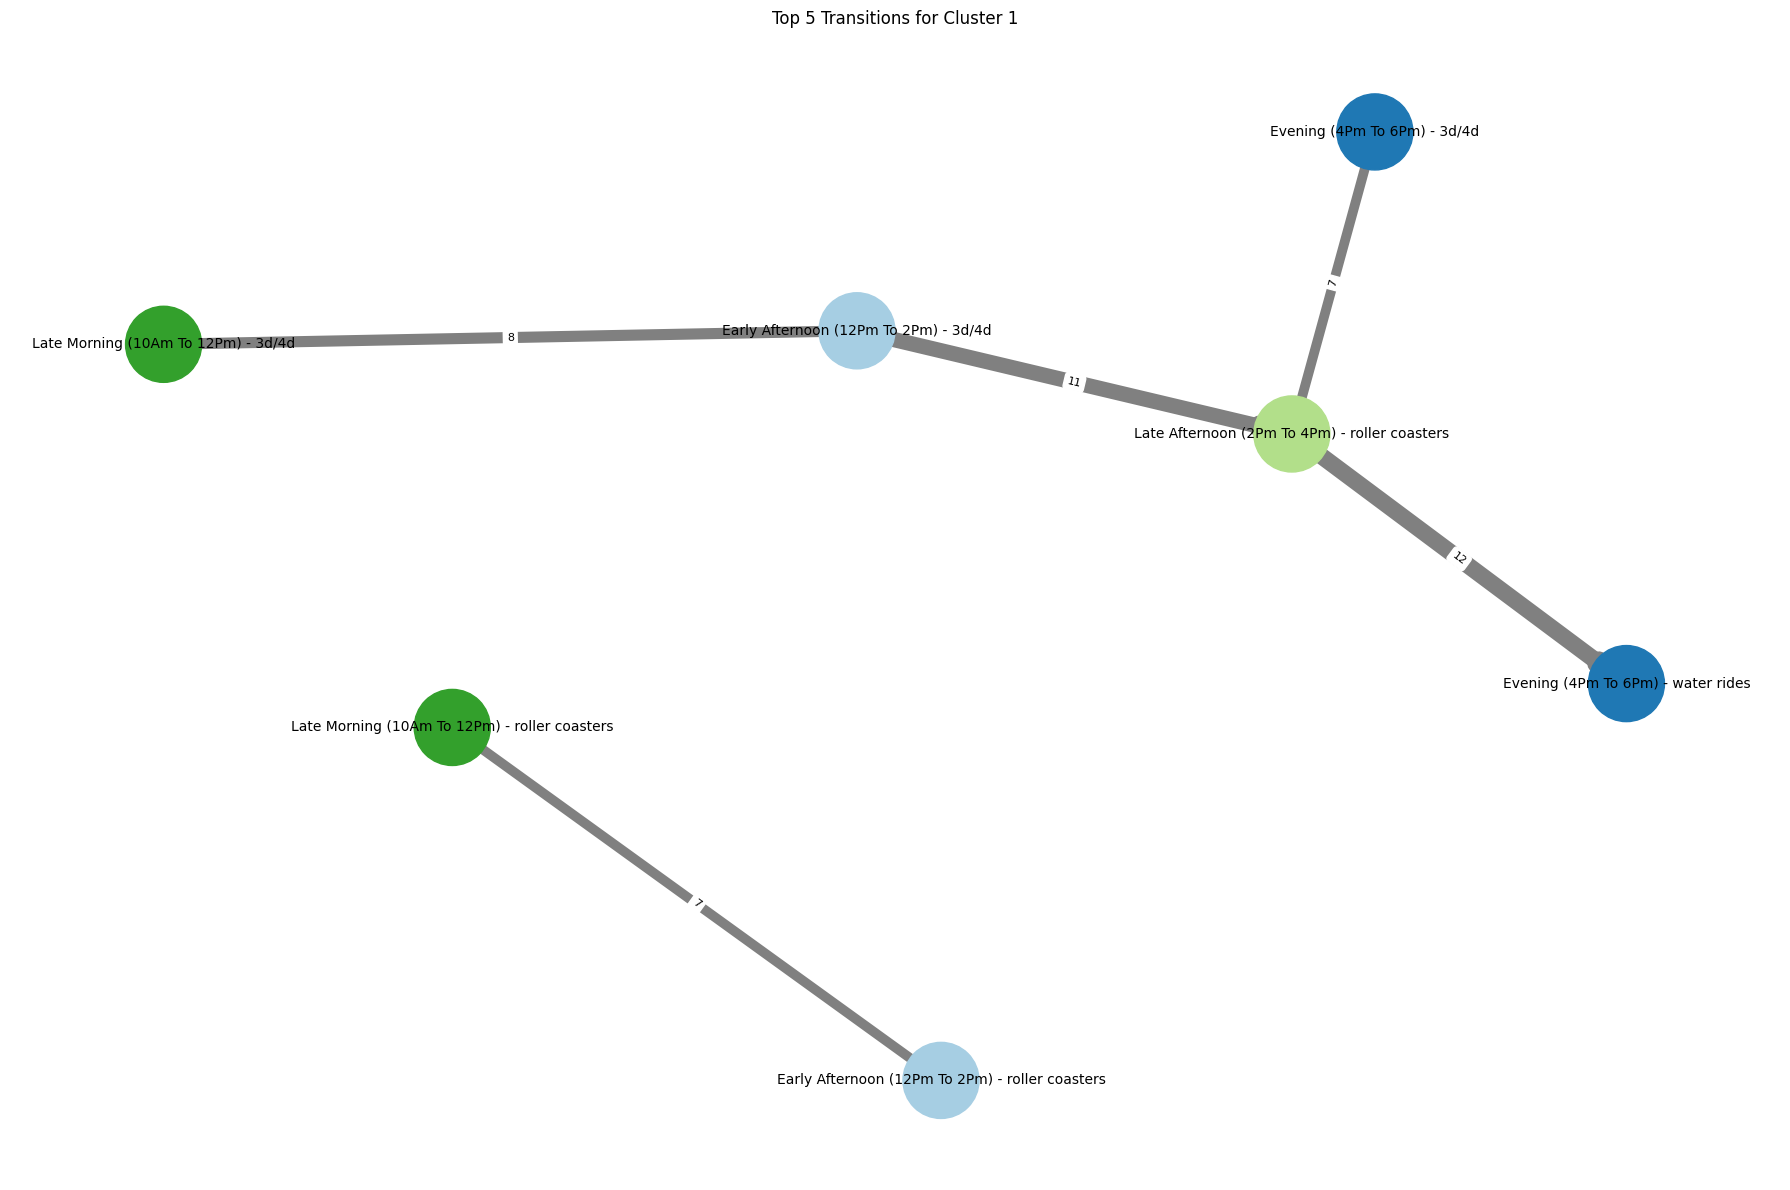

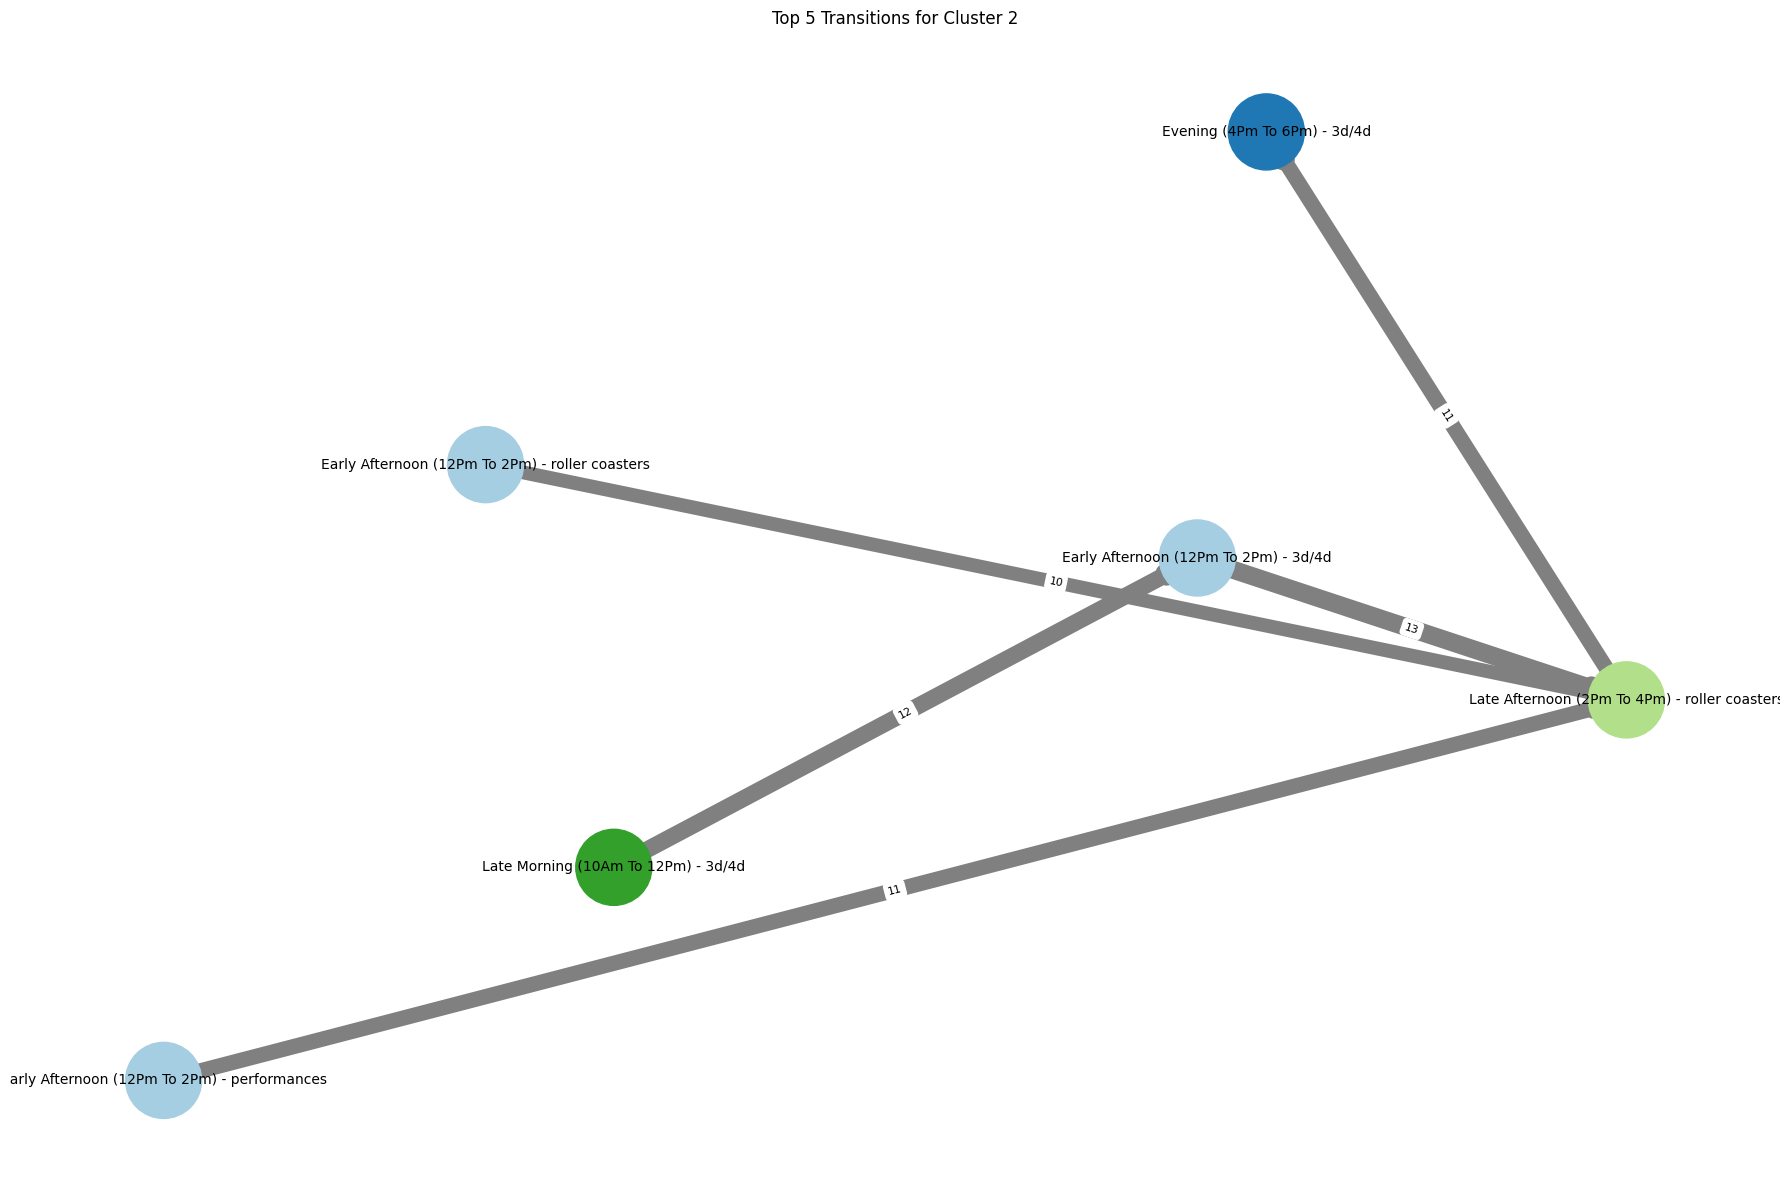

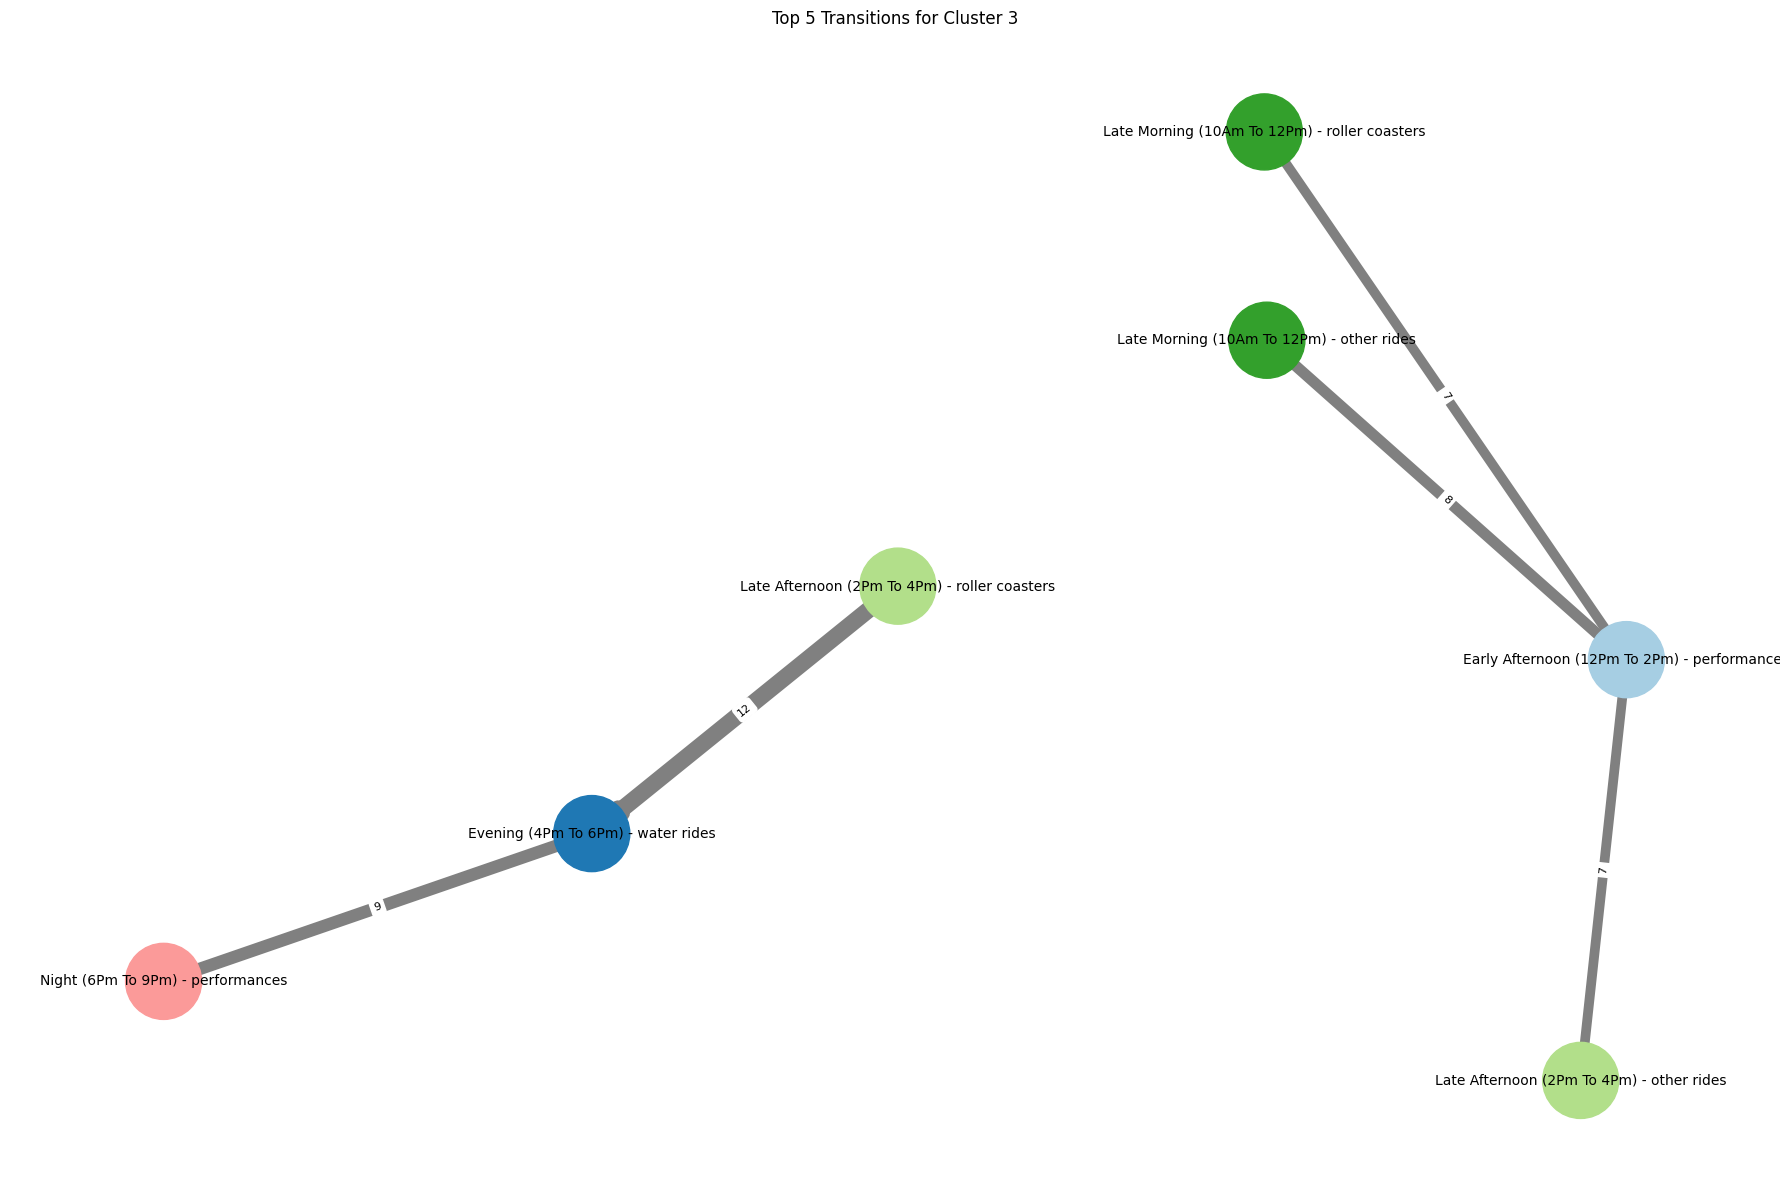

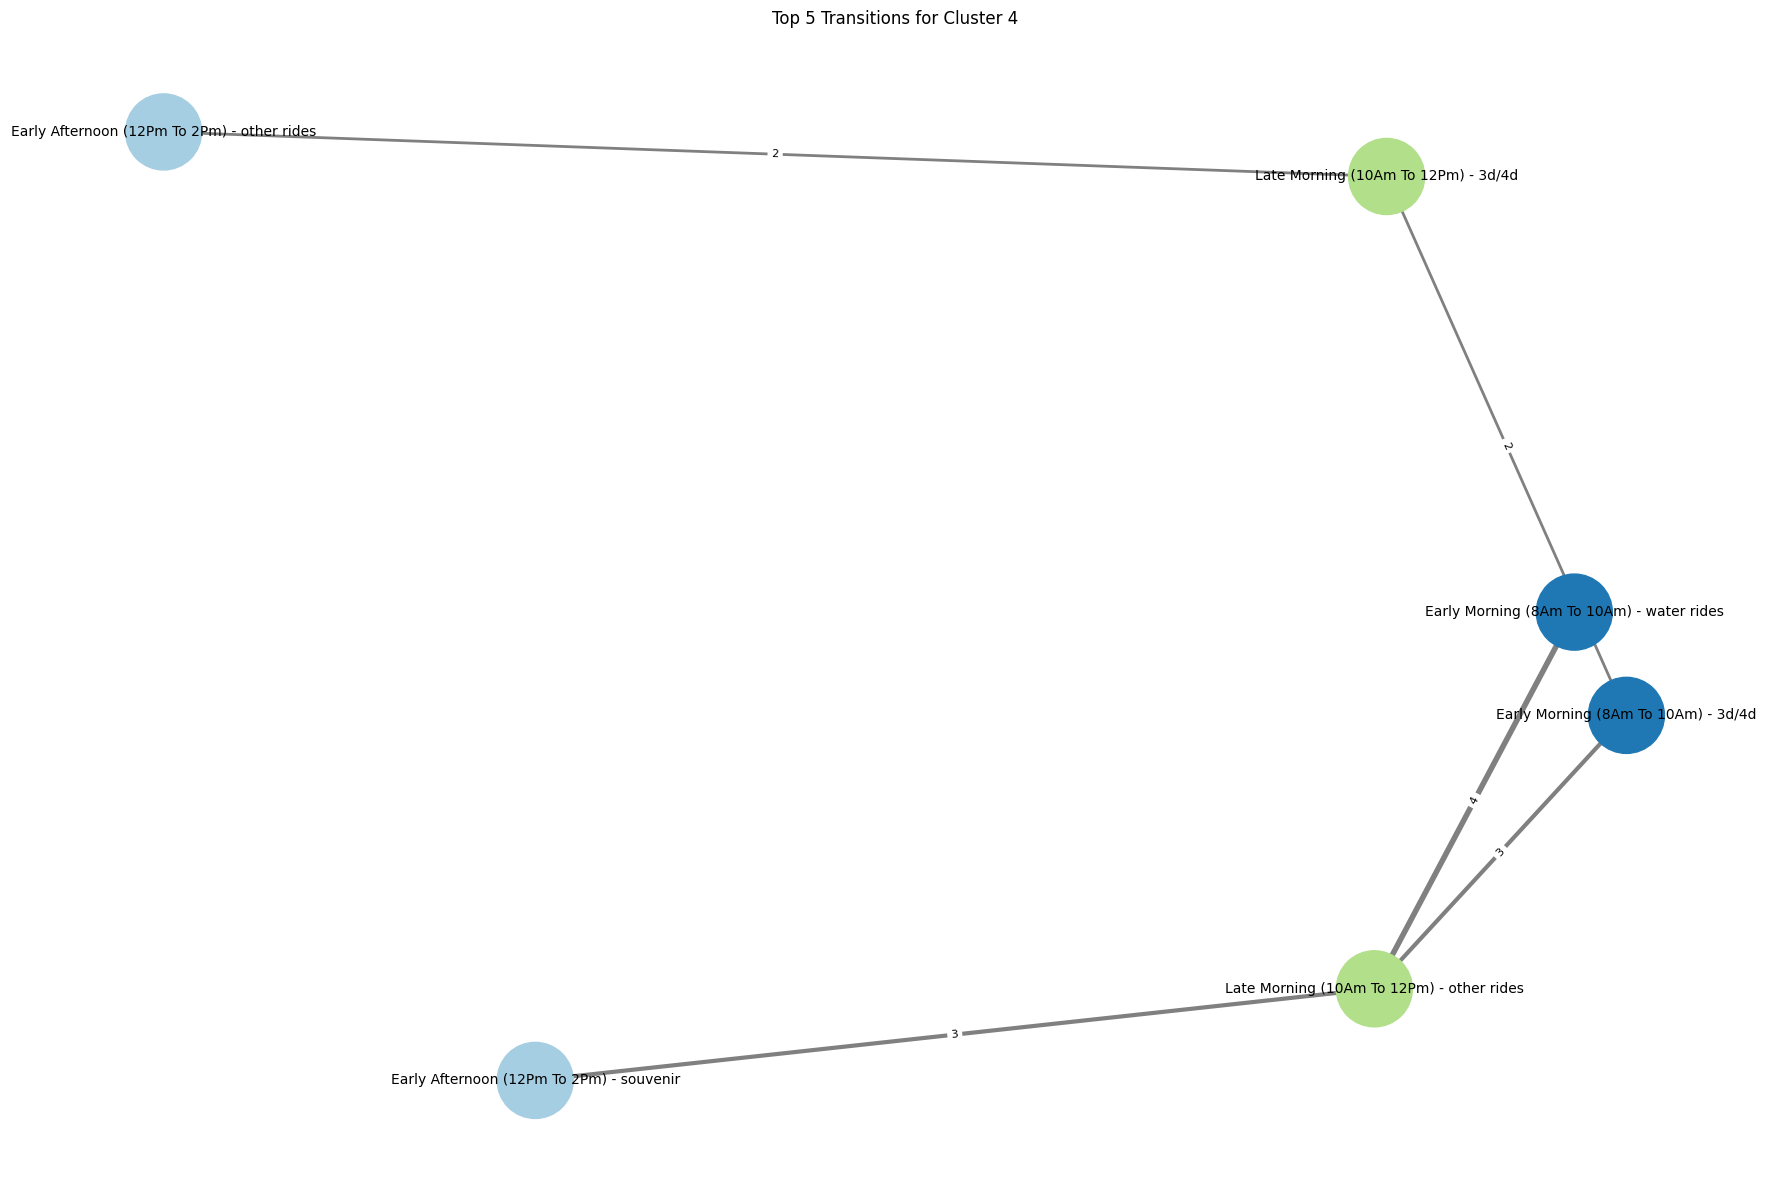

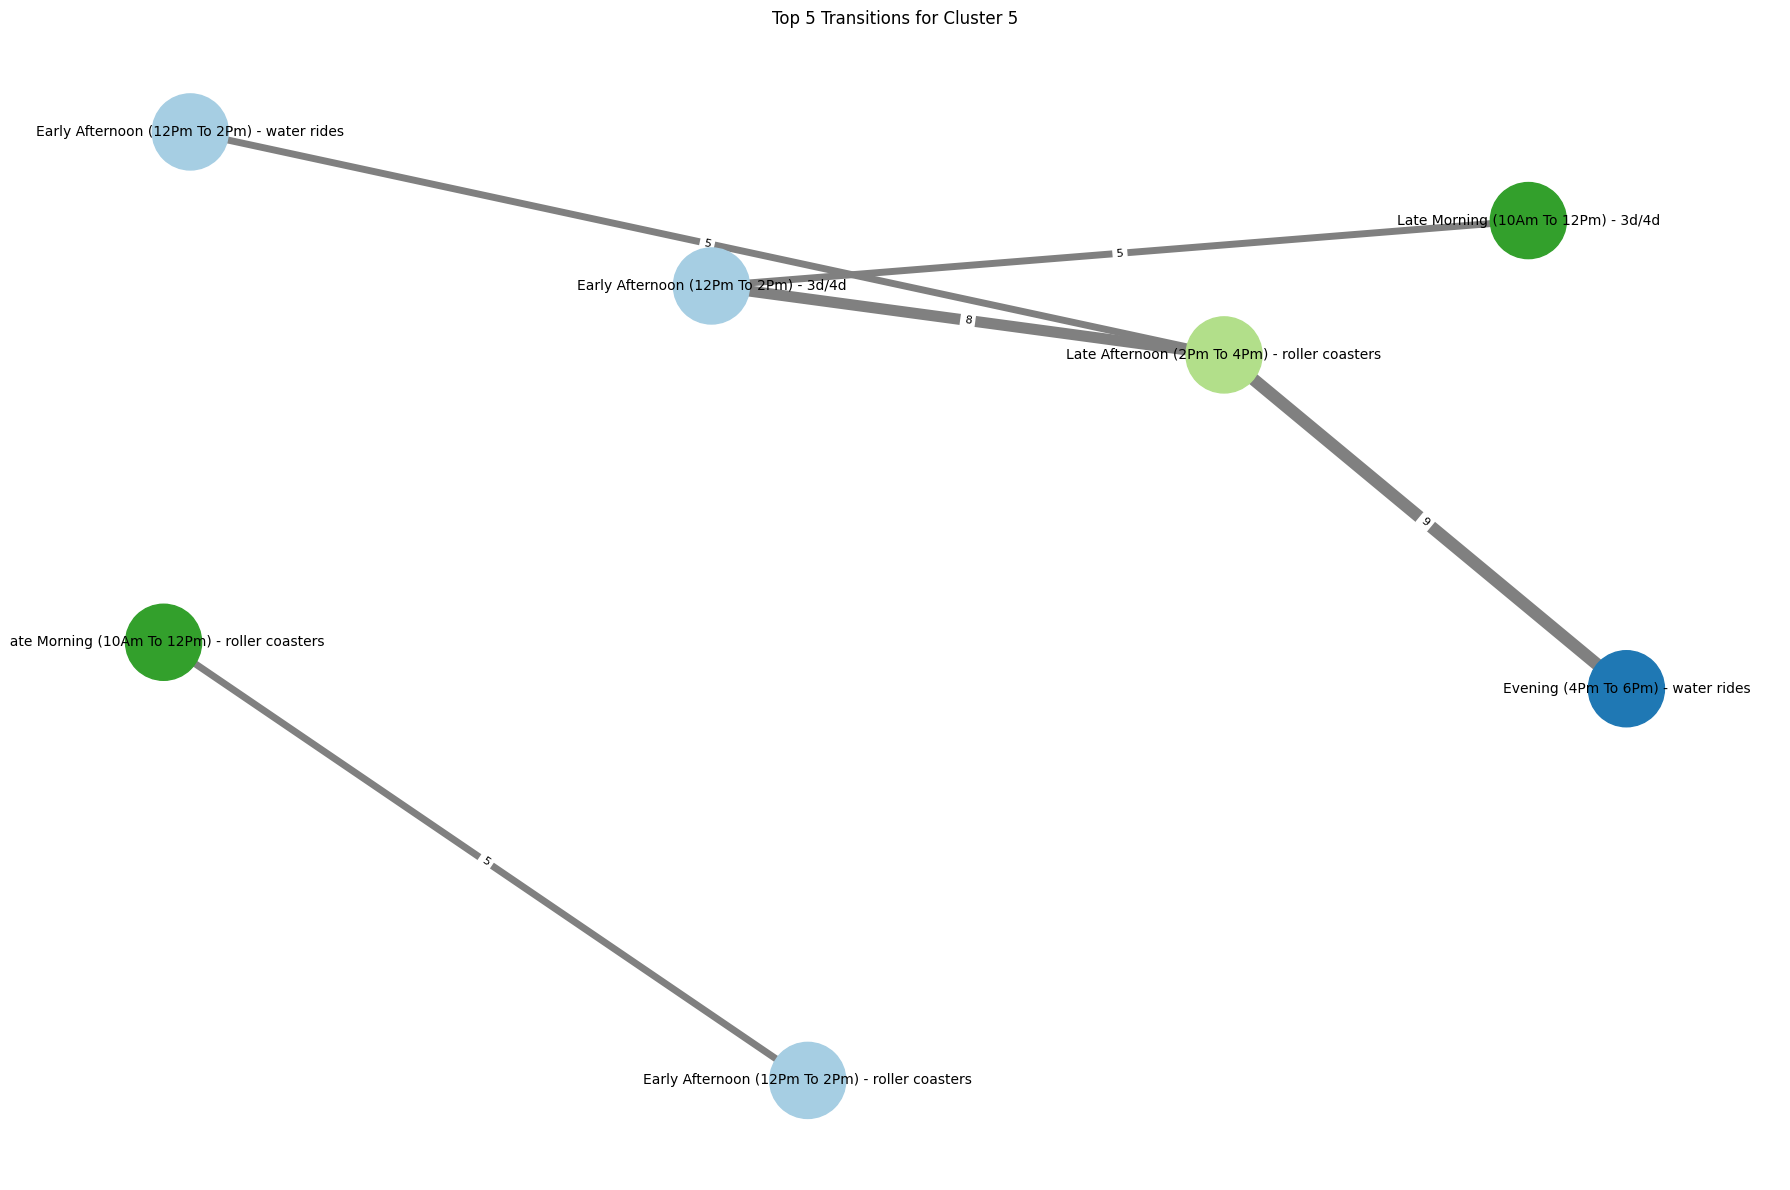

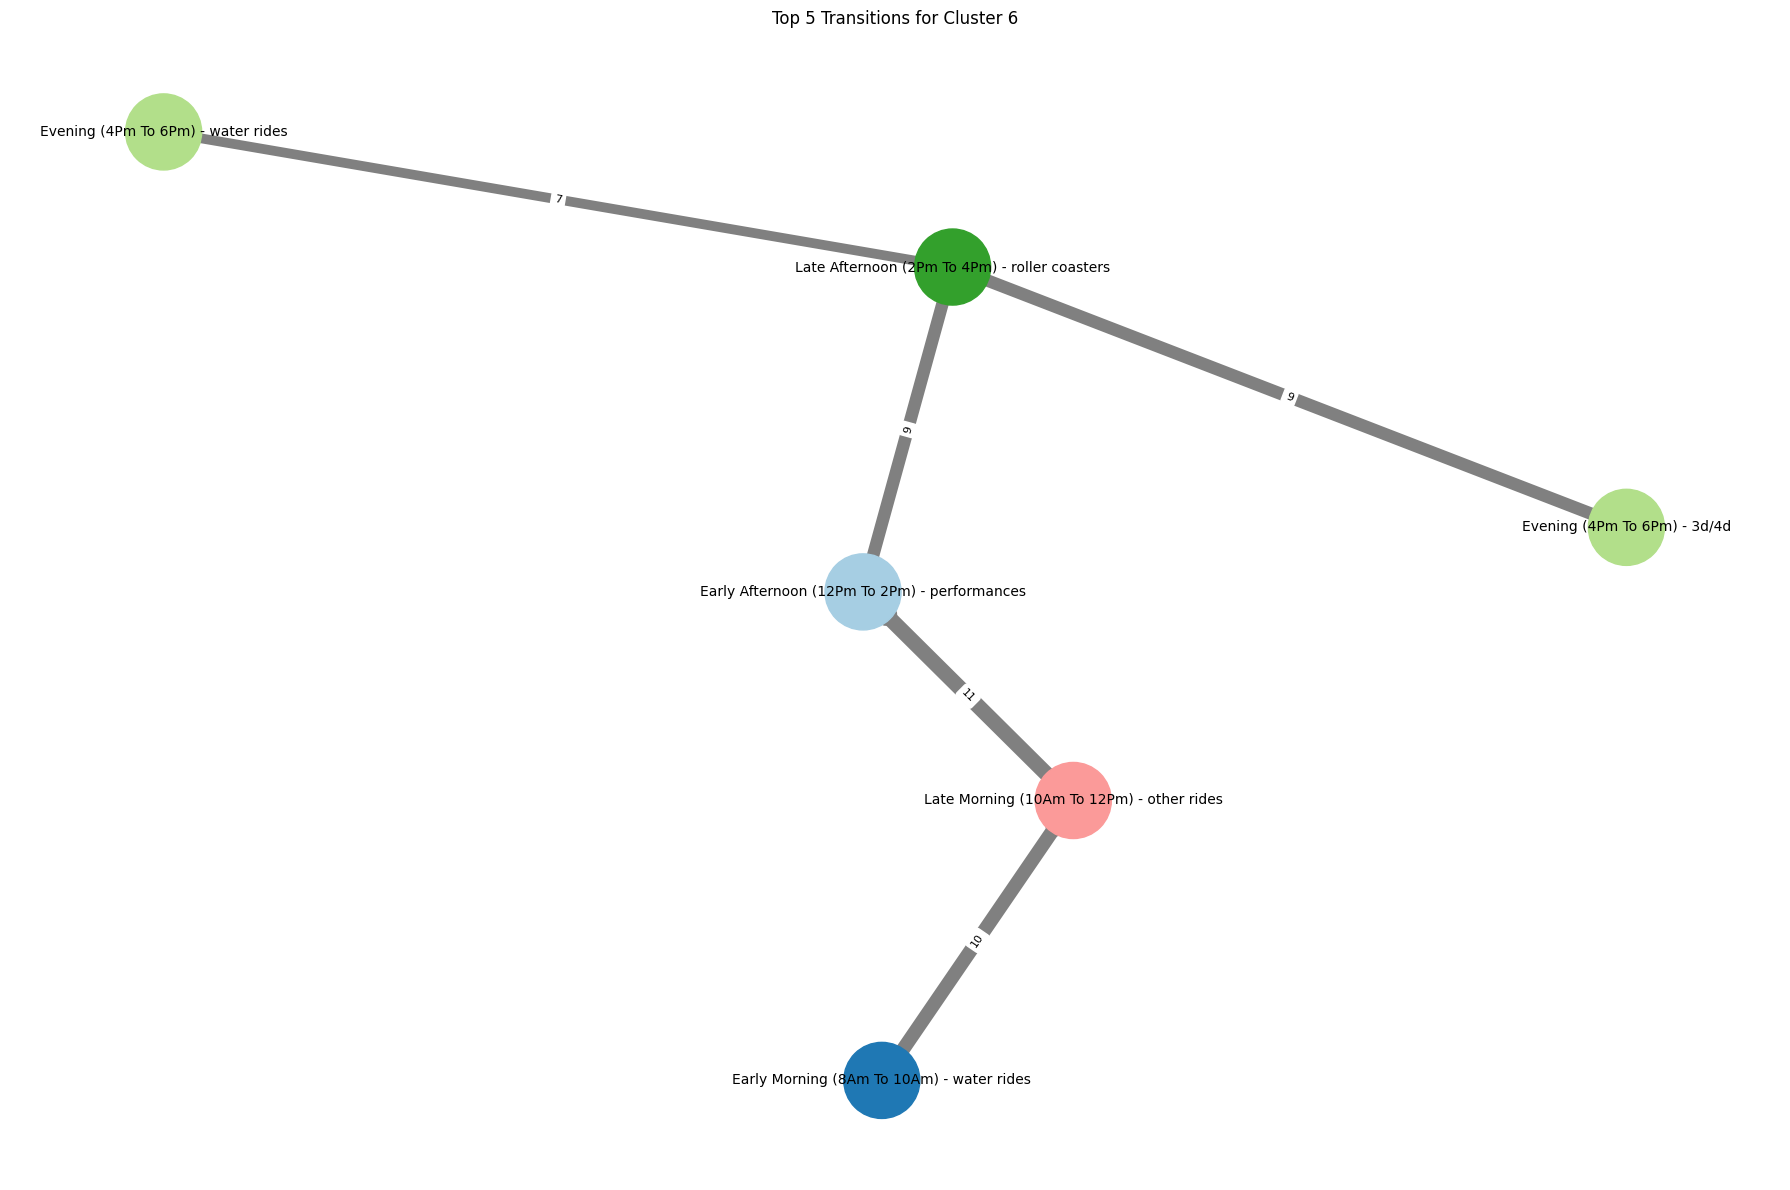

In [36]:
# Sort cluster IDs to ensure the order (0,1,2,3,4,5,6)
sorted_clusters = sorted(df_clean['cluster'].unique())

# Iterate through each cluster in sorted order
for cluster_id in sorted_clusters:
    # Filter data for the current cluster
    df_cluster = df_clean[df_clean['cluster'] == cluster_id]

    # Initialize a list to store transition pairs
    transition_pairs = []

    # Extract visitor journey paths and generate transition pairs
    for path in df_cluster['first_only_string']:
        steps = path.split(' ➝ ')  # Split the journey into individual steps
        for i in range(len(steps) - 1):  # Create pairs of consecutive attractions
            transition_pairs.append((steps[i], steps[i+1]))

    # Count the frequency of each transition pair
    transition_counts = Counter(transition_pairs)

    # Filter transitions to only include valid consecutive time jumps
    filtered_transitions = [
        (s, t, w) for (s, t), w in transition_counts.items()
        if is_valid_transition(s, t)
    ]

    # Select the top 5 most frequent transitions within the cluster
    top_transitions = sorted(filtered_transitions, key=lambda x: x[2], reverse=True)[:5]


    # STEP 4: Build a directed graph with the top transitions
    G = nx.DiGraph()
    for src, tgt, weight in top_transitions:
        G.add_edge(src, tgt, weight=weight)


    # STEP 5: Visualize the graph
    pos = nx.spring_layout(G, k=1.5, seed=42)
    plt.figure(figsize=(18, 12))

    # === Time-based Coloring for Nodes ===
    # Helper to extract time slot from node label
    def extract_time_slot(node_label):
        return node_label.split(" - ")[0]  # e.g., "Evening (4Pm To 6Pm)"

    # Create color map for this cluster's time slots
    time_slots = sorted({extract_time_slot(node) for node in G.nodes()})
    color_map = {
        slot: color for slot, color in zip(
            time_slots,
            plt.cm.Paired.colors[:len(time_slots)]
        )
    }

    # Assign node colors based on extracted time slot
    node_colors = [color_map[extract_time_slot(node)] for node in G.nodes()]


    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000)

    # Draw edges with widths based on transition frequency
    edges = G.edges(data=True)
    nx.draw_networkx_edges(
        G, pos,
        edgelist=edges,
        width=[d['weight'] for (_, _, d) in edges],
        edge_color='gray',
        arrows=True
    )

    # Draw labels for nodes
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Label edges with transition frequencies
    edge_labels = {(u, v): d['weight'] for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(f"Top 5 Transitions for Cluster {int(cluster_id)}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

###  Cluster-Based Transition Highlights (From Graphs Obtained)

Results Obtained:

<!DOCTYPE html>
  <html lang="en">
  <head>
      <meta charset="UTF-8">
      <meta name="viewport" content="width=device-width, initial-scale=1.0">
      <style>
          table {
              width: 50%;
              border-collapse: collapse;
              margin: 20px 0;
          }
          th, td {
              border: 1px solid black;
              padding: 10px;
              text-align: center;
          }
      </style>
  </head>
  <body>
      <table>
          <thead>
              <tr>
                  <th>Cluster Number</th>
                  <th>Early Morning  -> Late Morning</th>
                  <th>Late Morning  -> Early Afternoon</th>
                  <th>Early Afternoon  -> Late Afternoon</th>
                  <th>Late Afternoon  -> Evening</th>
                  <th>Evening  -> Night</th>
              </tr>
          </thead>
          <tbody>
              <tr>
                  <th>0</th>
                  <th>Water Rides -> Roadshows</th>
                  <th>Roadshows -> Other Rides</th>
                  <th>Other Rides -> Performances</th>
                  <th></th>
                  <th>Performances -> 3D/4D, 3D/4D-> Performances</th>
              </tr>
              <tr>
                  <th>1</th>
                  <th>-</th>
                  <th>Roadshows -> Other Rides</th>
                  <th>Other Rides -> 3D/4D</th>
                  <th>Roller Coasters ->Performances, 3D/4D -> 3D/4D</th>
                  <th>3D/4D -> Performances </th>
              </tr>
              <tr>
                  <th>2</th>
                  <th>-</th>
                  <th>Roadshows -> Other Rides</th>
                  <th>Other Rides -> Roller Coasters, 3D/4D</th>
                  <th>3D/4D -> 3D/4D</th>
                  <th>Performances -> 3D/4D</th>
              </tr>
              <tr>
                  <th>3</th>
                  <th>Eateries -> Roadshows </th>
                  <th>Roadshows -> Roller Coasters, Other Rides</th>
                  <th>Other Rides -> Roller Coasters</th>
                  <th>Roller Coasters -> Performances</th>
                  <th>-</th>
              </tr>
              <tr>
                  <th>4</th>
                  <th>3D/4D -> Roadshows </th>
                  <th>Roadshows -> Other Rides</th>
                  <th>Other Rides -> 3D/4D</th>
                  <th>Roller Coasters -> Performances</th>
                  <th>Performances -> 3D/4D</th>
              </tr>
              <tr>
                  <th>5</th>
                  <th>-</th>
                  <th>Other Rides -> Other Rides</th>
                  <th>Other Rides -> Roller Coasters, 3D/4D</th>
                  <th>Roller Coasters -> Performances, 3D/4D -> 3D/4D</th>
                  <th>-</th>
              </tr>
              <tr>
                  <th>6</th>
                  <th>Eateries -> Other Rides</th>
                  <th>Other Rides -> Other Rides, 3D/4D</th>
                  <th>Other Rides -> Roller Coasters</th>
                  <th>Roller Coasters -> Performances</th>
                  <th>-</th>
              </tr>
      </table>
  </body>
  </html>

(Table 1 above)

**Key insights From The Top 5 Transition Routes By Cluster At USS:**

1) Roadshows in Late Morning → Other Rides in Early Afternoon

Five clusters consistently show transitions from roadshows to other rides, indicating these two attraction types—and the connecting paths—are likely to be high-traffic zones during this period. This pattern suggests a midday crowd buildup around these areas, calling for potential redistribution or queue management strategies.

2) Rides Dominate the Afternoon Flow

Across nearly all clusters, guests visit Other Rides in the early afternoon, followed by Roller Coasters in the late afternoon. A mix of 3D/4D attractions often appears between these two ride categories, indicating a preference for alternating between high-energy and immersive experiences. This reflects a natural rhythm in pacing their energy levels throughout the afternoon.

3) Performances and 3D/4D Are Favored End-of-Day Activities

Most clusters show transitions from roller coasters to performances and 3D/4D in the evening. From evening to night, visitors tend to rotate between these two attraction types. This suggests that guests prefer to wind down their day with more relaxed, passive entertainment, after an active afternoon.

4) Strategic Operational Recommendations

Since multiple clusters share similar transition behaviors, USS can improve flow by geographically spreading out attractions of the same category, especially Other Rides, which consistently draw crowds in the early afternoon.

Additionally, the park can introduce personalized nudges via the USS app or signage to divert visitors to alternative attractions during peak hours. For instance, families might be recommended nearby eateries or shows, while thrill-seekers could be encouraged to explore underutilized thrill rides with shorter queues.


--------------------------------------------------------------------------------

**Possible Personalisation by Cluster**

Given the cluster information from Subgroup A Question 2 and results Table 1 above:

* Cluster 1 and 2 guests—typically thrill-seeking socialites and tourist explorers—frequently transition from roadshows to other rides, and later concentrate around 3D/4D attractions and roller coasters. For these groups, USS can recommend afternoon thrill itineraries, send in-app notifications about 3D/4D availability, or offer express pass bundles timed to their peak activity hours.

* In contrast, Clusters 3 and 4, which represent families and young planners, begin their day earlier and follow structured paths through eateries, roadshows, and gentler attractions before transitioning to performances. USS can enhance their experience by offering curated family-friendly routes in the mobile app, including show reservations, meal package deals, and wait-time alerts for rides that match their pace and preference.

* Evening-focused transitions, such as those seen in Clusters 0 - who tend to engage in performances and 3D/4D interactions later in the day—reveal an opportunity to personalise the park experience with targeted recommendations for showtimes, reserved seating, or nearby dining before events begin.

--------------------------------------------------------------------------------

### Overall Summary:

Analyzing guest journey patterns at Universal Studios Singapore (USS) is crucial for improving overall visitor satisfaction, optimizing park operations, and enhancing the guest experience. By understanding how guests move through the park at different times of the day, USS can strategically allocate resources such as staff, ride operations, and food service availability to reduce bottlenecks and improve efficiency.

Ultimately, by leveraging data-driven insights, USS can create a smoother, more enjoyable experience that minimizes frustration, maximizes engagement, and encourages repeat visits.